<a href="https://colab.research.google.com/github/ale0xb/vis4dh-keywords/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy pandas gspread gspread_dataframe seaborn networkx bokeh altair

In [0]:
#general
import math
from collections import Counter
import json

#Data munching
import numpy as np
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import itertools

#Scipy
import scipy
import scipy.cluster.hierarchy as sch

#NLP
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
# stemmer = SnowballStemmer("english")
stemmer = PorterStemmer(PorterStemmer.NLTK_EXTENSIONS)


#Graphs
import networkx as nx
from bokeh.models.graphs import from_networkx

#Plotting
import seaborn as sns

import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, CategoricalColorMapper

from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, \
BoxZoomTool, WheelZoomTool, ResetTool, PanTool, SaveTool, ColumnDataSource, LabelSet

from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral5, d3

from bokeh.layouts import row


#debug
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [0]:
#Google
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
uk_us_spellings = {'accessorise': 'accessorize', 'accessorised': 'accessorized', 'accessorises': 'accessorizes', 'accessorising': 'accessorizing', 'acclimatisation': 'acclimatization', 'acclimatise': 'acclimatize', 'acclimatised': 'acclimatized', 'acclimatises': 'acclimatizes', 'acclimatising': 'acclimatizing', 'accoutrements': 'accouterments', 'aeon': 'eon', 'aeons': 'eons', 'aerogramme': 'aerogram', 'aerogrammes': 'aerograms', 'aeroplane': 'airplane', 'aeroplanes ': 'airplanes ', 'aesthete': 'esthete', 'aesthetes': 'esthetes', 'aesthetic': 'esthetic', 'aesthetically': 'esthetically', 'aesthetics': 'esthetics', 'aetiology': 'etiology', 'ageing': 'aging', 'aggrandisement': 'aggrandizement', 'agonise': 'agonize', 'agonised': 'agonized', 'agonises': 'agonizes', 'agonising': 'agonizing', 'agonisingly': 'agonizingly', 'almanack': 'almanac', 'almanacks': 'almanacs', 'aluminium': 'aluminum', 'amortisable': 'amortizable', 'amortisation': 'amortization', 'amortisations': 'amortizations', 'amortise': 'amortize', 'amortised': 'amortized', 'amortises': 'amortizes', 'amortising': 'amortizing', 'amphitheatre': 'amphitheater', 'amphitheatres': 'amphitheaters', 'anaemia': 'anemia', 'anaemic': 'anemic', 'anaesthesia': 'anesthesia', 'anaesthetic': 'anesthetic', 'anaesthetics': 'anesthetics', 'anaesthetise': 'anesthetize', 'anaesthetised': 'anesthetized', 'anaesthetises': 'anesthetizes', 'anaesthetising': 'anesthetizing', 'anaesthetist': 'anesthetist', 'anaesthetists': 'anesthetists', 'anaesthetize': 'anesthetize', 'anaesthetized': 'anesthetized', 'anaesthetizes': 'anesthetizes', 'anaesthetizing': 'anesthetizing', 'analogue': 'analog', 'analogues': 'analogs', 'analyse': 'analyze', 'analysed': 'analyzed', 'analyses': 'analyzes', 'analysing': 'analyzing', 'anglicise': 'anglicize', 'anglicised': 'anglicized', 'anglicises': 'anglicizes', 'anglicising': 'anglicizing', 'annualised': 'annualized', 'antagonise': 'antagonize', 'antagonised': 'antagonized', 'antagonises': 'antagonizes', 'antagonising': 'antagonizing', 'apologise': 'apologize', 'apologised': 'apologized', 'apologises': 'apologizes', 'apologising': 'apologizing', 'appal': 'appall', 'appals': 'appalls', 'appetiser': 'appetizer', 'appetisers': 'appetizers', 'appetising': 'appetizing', 'appetisingly': 'appetizingly', 'arbour': 'arbor', 'arbours': 'arbors', 'archaeological': 'archeological', 'archaeologically': 'archeologically', 'archaeologist': 'archeologist', 'archaeologists': 'archeologists', 'archaeology': 'archeology', 'ardour': 'ardor', 'armour': 'armor', 'armoured': 'armored', 'armourer': 'armorer', 'armourers': 'armorers', 'armouries': 'armories', 'armoury': 'armory', 'artefact': 'artifact', 'artefacts': 'artifacts', 'authorise': 'authorize', 'authorised': 'authorized', 'authorises': 'authorizes', 'authorising': 'authorizing', 'axe': 'ax', 'backpedalled': 'backpedaled', 'backpedalling': 'backpedaling', 'bannister': 'banister', 'bannisters': 'banisters', 'baptise': 'baptize', 'baptised': 'baptized', 'baptises': 'baptizes', 'baptising': 'baptizing', 'bastardise': 'bastardize', 'bastardised': 'bastardized', 'bastardises': 'bastardizes', 'bastardising': 'bastardizing', 'battleaxe': 'battleax', 'baulk': 'balk', 'baulked': 'balked', 'baulking': 'balking', 'baulks': 'balks', 'bedevilled': 'bedeviled', 'bedevilling': 'bedeviling', 'behaviour': 'behavior', 'behavioural': 'behavioral', 'behaviourism': 'behaviorism', 'behaviourist': 'behaviorist', 'behaviourists': 'behaviorists', 'behaviours': 'behaviors', 'behove': 'behoove', 'behoved': 'behooved', 'behoves': 'behooves', 'bejewelled': 'bejeweled', 'belabour': 'belabor', 'belaboured': 'belabored', 'belabouring': 'belaboring', 'belabours': 'belabors', 'bevelled': 'beveled', 'bevvies': 'bevies', 'bevvy': 'bevy', 'biassed': 'biased', 'biassing': 'biasing', 'bingeing': 'binging', 'bougainvillaea': 'bougainvillea', 'bougainvillaeas': 'bougainvilleas', 'bowdlerise': 'bowdlerize', 'bowdlerised': 'bowdlerized', 'bowdlerises': 'bowdlerizes', 'bowdlerising': 'bowdlerizing', 'breathalyse': 'breathalyze', 'breathalysed': 'breathalyzed', 'breathalyser': 'breathalyzer', 'breathalysers': 'breathalyzers', 'breathalyses': 'breathalyzes', 'breathalysing': 'breathalyzing', 'brutalise': 'brutalize', 'brutalised': 'brutalized', 'brutalises': 'brutalizes', 'brutalising': 'brutalizing', 'buses': 'busses', 'busing': 'bussing', 'caesarean': 'cesarean', 'caesareans': 'cesareans', 'calibre': 'caliber', 'calibres': 'calibers', 'calliper': 'caliper', 'callipers': 'calipers', 'callisthenics': 'calisthenics', 'canalise': 'canalize', 'canalised': 'canalized', 'canalises': 'canalizes', 'canalising': 'canalizing', 'cancellation': 'cancelation', 'cancellations': 'cancelations', 'cancelled': 'canceled', 'cancelling': 'canceling', 'candour': 'candor', 'cannibalise': 'cannibalize', 'cannibalised': 'cannibalized', 'cannibalises': 'cannibalizes', 'cannibalising': 'cannibalizing', 'canonise': 'canonize', 'canonised': 'canonized', 'canonises': 'canonizes', 'canonising': 'canonizing', 'capitalise': 'capitalize', 'capitalised': 'capitalized', 'capitalises': 'capitalizes', 'capitalising': 'capitalizing', 'caramelise': 'caramelize', 'caramelised': 'caramelized', 'caramelises': 'caramelizes', 'caramelising': 'caramelizing', 'carbonise': 'carbonize', 'carbonised': 'carbonized', 'carbonises': 'carbonizes', 'carbonising': 'carbonizing', 'carolled': 'caroled', 'carolling': 'caroling', 'catalogue': 'catalog', 'catalogued': 'cataloged', 'catalogues': 'catalogs', 'cataloguing': 'cataloging', 'catalyse': 'catalyze', 'catalysed': 'catalyzed', 'catalyses': 'catalyzes', 'catalysing': 'catalyzing', 'categorise': 'categorize', 'categorised': 'categorized', 'categorises': 'categorizes', 'categorising': 'categorizing', 'cauterise': 'cauterize', 'cauterised': 'cauterized', 'cauterises': 'cauterizes', 'cauterising': 'cauterizing', 'cavilled': 'caviled', 'cavilling': 'caviling', 'centigramme': 'centigram', 'centigrammes': 'centigrams', 'centilitre': 'centiliter', 'centilitres': 'centiliters', 'centimetre': 'centimeter', 'centimetres': 'centimeters', 'centralise': 'centralize', 'centralised': 'centralized', 'centralises': 'centralizes', 'centralising': 'centralizing', 'centre': 'center', 'centred': 'centered', 'centrefold': 'centerfold', 'centrefolds': 'centerfolds', 'centrepiece': 'centerpiece', 'centrepieces': 'centerpieces', 'centres': 'centers', 'channelled': 'channeled', 'channelling': 'channeling', 'characterise': 'characterize', 'characterised': 'characterized', 'characterises': 'characterizes', 'characterising': 'characterizing', 'cheque': 'check', 'chequebook': 'checkbook', 'chequebooks': 'checkbooks', 'chequered': 'checkered', 'cheques': 'checks', 'chilli': 'chili', 'chimaera': 'chimera', 'chimaeras': 'chimeras', 'chiselled': 'chiseled', 'chiselling': 'chiseling', 'circularise': 'circularize', 'circularised': 'circularized', 'circularises': 'circularizes', 'circularising': 'circularizing', 'civilise': 'civilize', 'civilised': 'civilized', 'civilises': 'civilizes', 'civilising': 'civilizing', 'clamour': 'clamor', 'clamoured': 'clamored', 'clamouring': 'clamoring', 'clamours': 'clamors', 'clangour': 'clangor', 'clarinettist': 'clarinetist', 'clarinettists': 'clarinetists', 'collectivise': 'collectivize', 'collectivised': 'collectivized', 'collectivises': 'collectivizes', 'collectivising': 'collectivizing', 'colonisation': 'colonization', 'colonise': 'colonize', 'colonised': 'colonized', 'coloniser': 'colonizer', 'colonisers': 'colonizers', 'colonises': 'colonizes', 'colonising': 'colonizing', 'colour': 'color', 'colourant': 'colorant', 'colourants': 'colorants', 'coloured': 'colored', 'coloureds': 'coloreds', 'colourful': 'colorful', 'colourfully': 'colorfully', 'colouring': 'coloring', 'colourize': 'colorize', 'colourized': 'colorized', 'colourizes': 'colorizes', 'colourizing': 'colorizing', 'colourless': 'colorless', 'colours': 'colors', 'commercialise': 'commercialize', 'commercialised': 'commercialized', 'commercialises': 'commercializes', 'commercialising': 'commercializing', 'compartmentalise': 'compartmentalize', 'compartmentalised': 'compartmentalized', 'compartmentalises': 'compartmentalizes', 'compartmentalising': 'compartmentalizing', 'computerise': 'computerize', 'computerised': 'computerized', 'computerises': 'computerizes', 'computerising': 'computerizing', 'conceptualise': 'conceptualize', 'conceptualised': 'conceptualized', 'conceptualises': 'conceptualizes', 'conceptualising': 'conceptualizing', 'connexion': 'connection', 'connexions': 'connections', 'contextualise': 'contextualize', 'contextualised': 'contextualized', 'contextualises': 'contextualizes', 'contextualising': 'contextualizing', 'cosier': 'cozier', 'cosies': 'cozies', 'cosiest': 'coziest', 'cosily': 'cozily', 'cosiness': 'coziness', 'cosy': 'cozy', 'councillor': 'councilor', 'councillors': 'councilors', 'counselled': 'counseled', 'counselling': 'counseling', 'counsellor': 'counselor', 'counsellors': 'counselors', 'crenellated': 'crenelated', 'criminalise': 'criminalize', 'criminalised': 'criminalized', 'criminalises': 'criminalizes', 'criminalising': 'criminalizing', 'criticise': 'criticize', 'criticised': 'criticized', 'criticises': 'criticizes', 'criticising': 'criticizing', 'crueller': 'crueler', 'cruellest': 'cruelest', 'crystallisation': 'crystallization', 'crystallise': 'crystallize', 'crystallised': 'crystallized', 'crystallises': 'crystallizes', 'crystallising': 'crystallizing', 'cudgelled': 'cudgeled', 'cudgelling': 'cudgeling', 'customise': 'customize', 'customised': 'customized', 'customises': 'customizes', 'customising': 'customizing', 'cypher': 'cipher', 'cyphers': 'ciphers', 'decentralisation': 'decentralization', 'decentralise': 'decentralize', 'decentralised': 'decentralized', 'decentralises': 'decentralizes', 'decentralising': 'decentralizing', 'decriminalisation': 'decriminalization', 'decriminalise': 'decriminalize', 'decriminalised': 'decriminalized', 'decriminalises': 'decriminalizes', 
                   'decriminalising': 'decriminalizing', 'defence': 'defense', 'defenceless': 'defenseless', 'defences': 'defenses', 'dehumanisation': 'dehumanization', 'dehumanise': 'dehumanize', 'dehumanised': 'dehumanized', 'dehumanises': 'dehumanizes', 'dehumanising': 'dehumanizing', 'demeanour': 'demeanor', 'demilitarisation': 'demilitarization', 'demilitarise': 'demilitarize', 'demilitarised': 'demilitarized', 'demilitarises': 'demilitarizes', 'demilitarising': 'demilitarizing', 'demobilisation': 'demobilization', 'demobilise': 'demobilize', 'demobilised': 'demobilized', 'demobilises': 'demobilizes', 'demobilising': 'demobilizing', 'democratisation': 'democratization', 'democratise': 'democratize', 'democratised': 'democratized', 'democratises': 'democratizes', 'democratising': 'democratizing', 'demonise': 'demonize', 'demonised': 'demonized', 'demonises': 'demonizes', 'demonising': 'demonizing', 'demoralisation': 'demoralization', 'demoralise': 'demoralize', 'demoralised': 'demoralized', 'demoralises': 'demoralizes', 'demoralising': 'demoralizing', 'denationalisation': 'denationalization', 'denationalise': 'denationalize', 'denationalised': 'denationalized', 'denationalises': 'denationalizes', 'denationalising': 'denationalizing', 'deodorise': 'deodorize', 'deodorised': 'deodorized', 'deodorises': 'deodorizes', 'deodorising': 'deodorizing', 'depersonalise': 'depersonalize', 'depersonalised': 'depersonalized', 'depersonalises': 'depersonalizes', 'depersonalising': 'depersonalizing', 'deputise': 'deputize', 'deputised': 'deputized', 'deputises': 'deputizes', 'deputising': 'deputizing', 'desensitisation': 'desensitization', 'desensitise': 'desensitize', 'desensitised': 'desensitized', 'desensitises': 'desensitizes', 'desensitising': 'desensitizing', 'destabilisation': 'destabilization', 'destabilise': 'destabilize', 'destabilised': 'destabilized', 'destabilises': 'destabilizes', 'destabilising': 'destabilizing', 'dialled': 'dialed', 'dialling': 'dialing', 'dialogue': 'dialog', 'dialogues': 'dialogs', 'diarrhoea': 'diarrhea', 'digitise': 'digitize', 'digitised': 'digitized', 'digitises': 'digitizes', 'digitising': 'digitizing', 'disc': 'disk', 'discolour': 'discolor', 'discoloured': 'discolored', 'discolouring': 'discoloring', 'discolours': 'discolors', 'discs': 'disks', 'disembowelled': 'disemboweled', 'disembowelling': 'disemboweling', 'disfavour': 'disfavor', 'dishevelled': 'disheveled', 'dishonour': 'dishonor', 'dishonourable': 'dishonorable', 'dishonourably': 'dishonorably', 'dishonoured': 'dishonored', 'dishonouring': 'dishonoring', 'dishonours': 'dishonors', 'disorganisation': 'disorganization', 'disorganised': 'disorganized', 'distil': 'distill', 'distils': 'distills', 'dramatisation': 'dramatization', 'dramatisations': 'dramatizations', 'dramatise': 'dramatize', 'dramatised': 'dramatized', 'dramatises': 'dramatizes', 'dramatising': 'dramatizing', 'draught': 'draft', 'draughtboard': 'draftboard', 'draughtboards': 'draftboards', 'draughtier': 'draftier', 'draughtiest': 'draftiest', 'draughts': 'drafts', 'draughtsman': 'draftsman', 'draughtsmanship': 'draftsmanship', 'draughtsmen': 'draftsmen', 'draughtswoman': 'draftswoman', 'draughtswomen': 'draftswomen', 'draughty': 'drafty', 'drivelled': 'driveled', 'drivelling': 'driveling', 'duelled': 'dueled', 'duelling': 'dueling', 'economise': 'economize', 'economised': 'economized', 'economises': 'economizes', 'economising': 'economizing', 'edoema': 'edema ', 'editorialise': 'editorialize', 'editorialised': 'editorialized', 'editorialises': 'editorializes', 'editorialising': 'editorializing', 'empathise': 'empathize', 'empathised': 'empathized', 'empathises': 'empathizes', 'empathising': 'empathizing', 'emphasise': 'emphasize', 'emphasised': 'emphasized', 'emphasises': 'emphasizes', 'emphasising': 'emphasizing', 'enamelled': 'enameled', 'enamelling': 'enameling', 'enamoured': 'enamored', 'encyclopaedia': 'encyclopedia', 'encyclopaedias': 'encyclopedias', 'encyclopaedic': 'encyclopedic', 'endeavour': 'endeavor', 'endeavoured': 'endeavored', 'endeavouring': 'endeavoring', 'endeavours': 'endeavors', 'energise': 'energize', 'energised': 'energized', 'energises': 'energizes', 'energising': 'energizing', 'enrol': 'enroll', 'enrols': 'enrolls', 'enthral': 'enthrall', 'enthrals': 'enthralls', 'epaulette': 'epaulet', 'epaulettes': 'epaulets', 'epicentre': 'epicenter', 'epicentres': 'epicenters', 'epilogue': 'epilog', 'epilogues': 'epilogs', 'epitomise': 'epitomize', 'epitomised': 'epitomized', 'epitomises': 'epitomizes', 'epitomising': 'epitomizing', 'equalisation': 'equalization', 'equalise': 'equalize', 'equalised': 'equalized', 'equaliser': 'equalizer', 'equalisers': 'equalizers', 'equalises': 'equalizes', 'equalising': 'equalizing', 'eulogise': 'eulogize', 'eulogised': 'eulogized', 'eulogises': 'eulogizes', 'eulogising': 'eulogizing', 'evangelise': 'evangelize', 'evangelised': 'evangelized', 'evangelises': 'evangelizes', 'evangelising': 'evangelizing', 'exorcise': 'exorcize', 'exorcised': 'exorcized', 'exorcises': 'exorcizes', 'exorcising': 'exorcizing', 'extemporisation': 'extemporization', 'extemporise': 'extemporize', 'extemporised': 'extemporized', 'extemporises': 'extemporizes', 'extemporising': 'extemporizing', 'externalisation': 'externalization', 'externalisations': 'externalizations', 'externalise': 'externalize', 'externalised': 'externalized', 'externalises': 'externalizes', 'externalising': 'externalizing', 'factorise': 'factorize', 'factorised': 'factorized', 'factorises': 'factorizes', 'factorising': 'factorizing', 'faecal': 'fecal', 'faeces': 'feces', 'familiarisation': 'familiarization', 'familiarise': 'familiarize', 'familiarised': 'familiarized', 'familiarises': 'familiarizes', 'familiarising': 'familiarizing', 'fantasise': 'fantasize', 'fantasised': 'fantasized', 'fantasises': 'fantasizes', 'fantasising': 'fantasizing', 'favour': 'favor', 'favourable': 'favorable', 'favourably': 'favorably', 'favoured': 'favored', 'favouring': 'favoring', 'favourite': 'favorite', 'favourites': 'favorites', 'favouritism': 'favoritism', 'favours': 'favors', 'feminise': 'feminize', 'feminised': 'feminized', 'feminises': 'feminizes', 'feminising': 'feminizing', 'fertilisation': 'fertilization', 'fertilise': 'fertilize', 'fertilised': 'fertilized', 'fertiliser': 'fertilizer', 'fertilisers': 'fertilizers', 'fertilises': 'fertilizes', 'fertilising': 'fertilizing', 'fervour': 'fervor', 'fibre': 'fiber', 'fibreglass': 'fiberglass', 'fibres': 'fibers', 'fictionalisation': 'fictionalization', 'fictionalisations': 'fictionalizations', 'fictionalise': 'fictionalize', 'fictionalised': 'fictionalized', 'fictionalises': 'fictionalizes', 'fictionalising': 'fictionalizing', 'fillet': 'filet', 'filleted ': 'fileted ', 'filleting': 'fileting', 'fillets ': 'filets ', 'finalisation': 'finalization', 'finalise': 'finalize', 'finalised': 'finalized', 'finalises': 'finalizes', 'finalising': 'finalizing', 'flautist': 'flutist', 'flautists': 'flutists', 'flavour': 'flavor', 'flavoured': 'flavored', 'flavouring': 'flavoring', 'flavourings': 'flavorings', 'flavourless': 'flavorless', 'flavours': 'flavors', 'flavoursome': 'flavorsome', 'flyer / flier ': 'flier / flyer ', 'foetal': 'fetal', 'foetid': 'fetid', 'foetus': 'fetus', 'foetuses': 'fetuses', 'formalisation': 'formalization', 'formalise': 'formalize', 'formalised': 'formalized', 'formalises': 'formalizes', 'formalising': 'formalizing', 'fossilisation': 'fossilization', 'fossilise': 'fossilize', 'fossilised': 'fossilized', 'fossilises': 'fossilizes', 'fossilising': 'fossilizing', 'fraternisation': 'fraternization', 'fraternise': 'fraternize', 'fraternised': 'fraternized', 'fraternises': 'fraternizes', 'fraternising': 'fraternizing', 'fulfil': 'fulfill', 'fulfilment': 'fulfillment', 'fulfils': 'fulfills', 'funnelled': 'funneled', 'funnelling': 'funneling', 'galvanise': 'galvanize', 'galvanised': 'galvanized', 'galvanises': 'galvanizes', 'galvanising': 'galvanizing', 'gambolled': 'gamboled', 'gambolling': 'gamboling', 'gaol': 'jail', 'gaolbird': 'jailbird', 'gaolbirds': 'jailbirds', 'gaolbreak': 'jailbreak', 'gaolbreaks': 'jailbreaks', 'gaoled': 'jailed', 'gaoler': 'jailer', 'gaolers': 'jailers', 'gaoling': 'jailing', 'gaols': 'jails', 'gases': 'gasses', 'gauge': 'gage', 'gauged': 'gaged', 'gauges': 'gages', 'gauging': 'gaging', 'generalisation': 'generalization', 'generalisations': 'generalizations', 'generalise': 'generalize', 'generalised': 'generalized', 'generalises': 'generalizes', 'generalising': 'generalizing', 'ghettoise': 'ghettoize', 'ghettoised': 'ghettoized', 'ghettoises': 'ghettoizes', 'ghettoising': 'ghettoizing', 'gipsies': 'gypsies', 'glamorise': 'glamorize', 'glamorised': 'glamorized', 'glamorises': 'glamorizes', 'glamorising': 'glamorizing', 'glamour': 'glamor', 'globalisation': 'globalization', 'globalise': 'globalize', 'globalised': 'globalized', 'globalises': 'globalizes', 'globalising': 'globalizing', 'glueing ': 'gluing ', 'goitre': 'goiter', 'goitres': 'goiters', 'gonorrhoea': 'gonorrhea', 'gramme': 'gram', 'grammes': 'grams', 'gravelled': 'graveled', 'grey': 'gray', 'greyed': 'grayed', 'greying': 'graying', 'greyish': 'grayish', 'greyness': 'grayness', 'greys': 'grays', 'grovelled': 'groveled', 'grovelling': 'groveling', 'groyne': 'groin', 'groynes ': 'groins', 'gruelling': 'grueling', 'gruellingly': 'gruelingly', 'gryphon': 'griffin', 'gryphons': 'griffins', 'gynaecological': 'gynecological', 'gynaecologist': 'gynecologist', 'gynaecologists': 'gynecologists', 'gynaecology': 'gynecology', 'haematological': 'hematological', 'haematologist': 'hematologist', 'haematologists': 'hematologists', 'haematology': 'hematology', 'haemoglobin': 'hemoglobin', 'haemophilia': 'hemophilia', 'haemophiliac': 'hemophiliac', 'haemophiliacs': 'hemophiliacs', 'haemorrhage': 'hemorrhage', 'haemorrhaged': 'hemorrhaged', 'haemorrhages': 'hemorrhages', 'haemorrhaging': 'hemorrhaging', 'haemorrhoids': 'hemorrhoids', 'harbour': 'harbor', 
                   'harboured': 'harbored', 'harbouring': 'harboring', 'harbours': 'harbors', 'harmonisation': 'harmonization', 'harmonise': 'harmonize', 'harmonised': 'harmonized', 'harmonises': 'harmonizes', 'harmonising': 'harmonizing', 'homoeopath': 'homeopath', 'homoeopathic': 'homeopathic', 'homoeopaths': 'homeopaths', 'homoeopathy': 'homeopathy', 'homogenise': 'homogenize', 'homogenised': 'homogenized', 'homogenises': 'homogenizes', 'homogenising': 'homogenizing', 'honour': 'honor', 'honourable': 'honorable', 'honourably': 'honorably', 'honoured': 'honored', 'honouring': 'honoring', 'honours': 'honors', 'hospitalisation': 'hospitalization', 'hospitalise': 'hospitalize', 'hospitalised': 'hospitalized', 'hospitalises': 'hospitalizes', 'hospitalising': 'hospitalizing', 'humanise': 'humanize', 'humanised': 'humanized', 'humanises': 'humanizes', 'humanising': 'humanizing', 'humour': 'humor', 'humoured': 'humored', 'humouring': 'humoring', 'humourless': 'humorless', 'humours': 'humors', 'hybridise': 'hybridize', 'hybridised': 'hybridized', 'hybridises': 'hybridizes', 'hybridising': 'hybridizing', 'hypnotise': 'hypnotize', 'hypnotised': 'hypnotized', 'hypnotises': 'hypnotizes', 'hypnotising': 'hypnotizing', 'hypothesise': 'hypothesize', 'hypothesised': 'hypothesized', 'hypothesises': 'hypothesizes', 'hypothesising': 'hypothesizing', 'idealisation': 'idealization', 'idealise': 'idealize', 'idealised': 'idealized', 'idealises': 'idealizes', 'idealising': 'idealizing', 'idolise': 'idolize', 'idolised': 'idolized', 'idolises': 'idolizes', 'idolising': 'idolizing', 'immobilisation': 'immobilization', 'immobilise': 'immobilize', 'immobilised': 'immobilized', 'immobiliser': 'immobilizer', 'immobilisers': 'immobilizers', 'immobilises': 'immobilizes', 'immobilising': 'immobilizing', 'immortalise': 'immortalize', 'immortalised': 'immortalized', 'immortalises': 'immortalizes', 'immortalising': 'immortalizing', 'immunisation': 'immunization', 'immunise': 'immunize', 'immunised': 'immunized', 'immunises': 'immunizes', 'immunising': 'immunizing', 'impanelled': 'impaneled', 'impanelling': 'impaneling', 'imperilled': 'imperiled', 'imperilling': 'imperiling', 'individualise': 'individualize', 'individualised': 'individualized', 'individualises': 'individualizes', 'individualising': 'individualizing', 'industrialise': 'industrialize', 'industrialised': 'industrialized', 'industrialises': 'industrializes', 'industrialising': 'industrializing', 'inflexion': 'inflection', 'inflexions': 'inflections', 'initialise': 'initialize', 'initialised': 'initialized', 'initialises': 'initializes', 'initialising': 'initializing', 'initialled': 'initialed', 'initialling': 'initialing', 'instal': 'install', 'instalment': 'installment', 'instalments': 'installments', 'instals': 'installs', 'instil': 'instill', 'instils': 'instills', 'institutionalisation': 'institutionalization', 'institutionalise': 'institutionalize', 'institutionalised': 'institutionalized', 'institutionalises': 'institutionalizes', 'institutionalising': 'institutionalizing', 'intellectualise': 'intellectualize', 'intellectualised': 'intellectualized', 'intellectualises': 'intellectualizes', 'intellectualising': 'intellectualizing', 'internalisation': 'internalization', 'internalise': 'internalize', 'internalised': 'internalized', 'internalises': 'internalizes', 'internalising': 'internalizing', 'internationalisation': 'internationalization', 'internationalise': 'internationalize', 'internationalised': 'internationalized', 'internationalises': 'internationalizes', 'internationalising': 'internationalizing', 'ionisation': 'ionization', 'ionise': 'ionize', 'ionised': 'ionized', 'ioniser': 'ionizer', 'ionisers': 'ionizers', 'ionises': 'ionizes', 'ionising': 'ionizing', 'italicise': 'italicize', 'italicised': 'italicized', 'italicises': 'italicizes', 'italicising': 'italicizing', 'itemise': 'itemize', 'itemised': 'itemized', 'itemises': 'itemizes', 'itemising': 'itemizing', 'jeopardise': 'jeopardize', 'jeopardised': 'jeopardized', 'jeopardises': 'jeopardizes', 'jeopardising': 'jeopardizing', 'jewelled': 'jeweled', 'jeweller': 'jeweler', 'jewellers': 'jewelers', 'jewellery': 'jewelry', 'judgement ': 'judgment', 'kilogramme': 'kilogram', 'kilogrammes': 'kilograms', 'kilometre': 'kilometer', 'kilometres': 'kilometers', 'labelled': 'labeled', 'labelling': 'labeling', 'labour': 'labor', 'laboured': 'labored', 'labourer': 'laborer', 'labourers': 'laborers', 'labouring': 'laboring', 'labours': 'labors', 'lacklustre': 'lackluster', 'legalisation': 'legalization', 'legalise': 'legalize', 'legalised': 'legalized', 'legalises': 'legalizes', 'legalising': 'legalizing', 'legitimise': 'legitimize', 'legitimised': 'legitimized', 'legitimises': 'legitimizes', 'legitimising': 'legitimizing', 'leukaemia': 'leukemia', 'levelled': 'leveled', 'leveller': 'leveler', 'levellers': 'levelers', 'levelling': 'leveling', 'libelled': 'libeled', 'libelling': 'libeling', 'libellous': 'libelous', 'liberalisation': 'liberalization', 'liberalise': 'liberalize', 'liberalised': 'liberalized', 'liberalises': 'liberalizes', 'liberalising': 'liberalizing', 'licence': 'license', 'licenced': 'licensed', 'licences': 'licenses', 'licencing': 'licensing', 'likeable': 'likable ', 'lionisation': 'lionization', 'lionise': 'lionize', 'lionised': 'lionized', 'lionises': 'lionizes', 'lionising': 'lionizing', 'liquidise': 'liquidize', 'liquidised': 'liquidized', 'liquidiser': 'liquidizer', 'liquidisers': 'liquidizers', 'liquidises': 'liquidizes', 'liquidising': 'liquidizing', 'litre': 'liter', 'litres': 'liters', 'localise': 'localize', 'localised': 'localized', 'localises': 'localizes', 'localising': 'localizing', 'louvre': 'louver', 'louvred': 'louvered', 'louvres': 'louvers ', 'lustre': 'luster', 'magnetise': 'magnetize', 'magnetised': 'magnetized', 'magnetises': 'magnetizes', 'magnetising': 'magnetizing', 'manoeuvrability': 'maneuverability', 'manoeuvrable': 'maneuverable', 'manoeuvre': 'maneuver', 'manoeuvred': 'maneuvered', 'manoeuvres': 'maneuvers', 'manoeuvring': 'maneuvering', 'manoeuvrings': 'maneuverings', 'marginalisation': 'marginalization', 'marginalise': 'marginalize', 'marginalised': 'marginalized', 'marginalises': 'marginalizes', 'marginalising': 'marginalizing', 'marshalled': 'marshaled', 'marshalling': 'marshaling', 'marvelled': 'marveled', 'marvelling': 'marveling', 'marvellous': 'marvelous', 'marvellously': 'marvelously', 'materialisation': 'materialization', 'materialise': 'materialize', 'materialised': 'materialized', 'materialises': 'materializes', 'materialising': 'materializing', 'maximisation': 'maximization', 'maximise': 'maximize', 'maximised': 'maximized', 'maximises': 'maximizes', 'maximising': 'maximizing', 'meagre': 'meager', 'mechanisation': 'mechanization', 'mechanise': 'mechanize', 'mechanised': 'mechanized', 'mechanises': 'mechanizes', 'mechanising': 'mechanizing', 'mediaeval': 'medieval', 'memorialise': 'memorialize', 'memorialised': 'memorialized', 'memorialises': 'memorializes', 'memorialising': 'memorializing', 'memorise': 'memorize', 'memorised': 'memorized', 'memorises': 'memorizes', 'memorising': 'memorizing', 'mesmerise': 'mesmerize', 'mesmerised': 'mesmerized', 'mesmerises': 'mesmerizes', 'mesmerising': 'mesmerizing', 'metabolise': 'metabolize', 'metabolised': 'metabolized', 'metabolises': 'metabolizes', 'metabolising': 'metabolizing', 'metre': 'meter', 'metres': 'meters', 'micrometre': 'micrometer', 'micrometres': 'micrometers', 'militarise': 'militarize', 'militarised': 'militarized', 'militarises': 'militarizes', 'militarising': 'militarizing', 'milligramme': 'milligram', 'milligrammes': 'milligrams', 'millilitre': 'milliliter', 'millilitres': 'milliliters', 'millimetre': 'millimeter', 'millimetres': 'millimeters', 'miniaturisation': 'miniaturization', 'miniaturise': 'miniaturize', 'miniaturised': 'miniaturized', 'miniaturises': 'miniaturizes', 'miniaturising': 'miniaturizing', 'minibuses': 'minibusses ', 'minimise': 'minimize', 'minimised': 'minimized', 'minimises': 'minimizes', 'minimising': 'minimizing', 'misbehaviour': 'misbehavior', 'misdemeanour': 'misdemeanor', 'misdemeanours': 'misdemeanors', 'misspelt': 'misspelled ', 'mitre': 'miter', 'mitres': 'miters', 'mobilisation': 'mobilization', 'mobilise': 'mobilize', 'mobilised': 'mobilized', 'mobilises': 'mobilizes', 'mobilising': 'mobilizing', 'modelled': 'modeled', 'modeller': 'modeler', 'modellers': 'modelers', 'modelling': 'modeling', 'modernise': 'modernize', 'modernised': 'modernized', 'modernises': 'modernizes', 'modernising': 'modernizing', 'moisturise': 'moisturize', 'moisturised': 'moisturized', 'moisturiser': 'moisturizer', 'moisturisers': 'moisturizers', 'moisturises': 'moisturizes', 'moisturising': 'moisturizing', 'monologue': 'monolog', 'monologues': 'monologs', 'monopolisation': 'monopolization', 'monopolise': 'monopolize', 'monopolised': 'monopolized', 'monopolises': 'monopolizes', 'monopolising': 'monopolizing', 'moralise': 'moralize', 'moralised': 'moralized', 'moralises': 'moralizes', 'moralising': 'moralizing', 'motorised': 'motorized', 'mould': 'mold', 'moulded': 'molded', 'moulder': 'molder', 'mouldered': 'moldered', 'mouldering': 'moldering', 'moulders': 'molders', 'mouldier': 'moldier', 'mouldiest': 'moldiest', 'moulding': 'molding', 'mouldings': 'moldings', 'moulds': 'molds', 'mouldy': 'moldy', 'moult': 'molt', 'moulted': 'molted', 'moulting': 'molting', 'moults': 'molts', 'moustache': 'mustache', 'moustached': 'mustached', 'moustaches': 'mustaches', 'moustachioed': 'mustachioed', 'multicoloured': 'multicolored', 'nationalisation': 'nationalization', 'nationalisations': 'nationalizations', 'nationalise': 'nationalize', 'nationalised': 'nationalized', 'nationalises': 'nationalizes', 'nationalising': 'nationalizing', 'naturalisation': 'naturalization', 'naturalise': 'naturalize', 'naturalised': 'naturalized', 'naturalises': 'naturalizes', 'naturalising': 'naturalizing', 'neighbour': 'neighbor', 
                   'neighbourhood': 'neighborhood', 'neighbourhoods': 'neighborhoods', 'neighbouring': 'neighboring', 'neighbourliness': 'neighborliness', 'neighbourly': 'neighborly', 'neighbours': 'neighbors', 'neutralisation': 'neutralization', 'neutralise': 'neutralize', 'neutralised': 'neutralized', 'neutralises': 'neutralizes', 'neutralising': 'neutralizing', 'normalisation': 'normalization', 'normalise': 'normalize', 'normalised': 'normalized', 'normalises': 'normalizes', 'normalising': 'normalizing', 'odour': 'odor', 'odourless': 'odorless', 'odours': 'odors', 'oesophagus': 'esophagus', 'oesophaguses': 'esophaguses', 'oestrogen': 'estrogen', 'offence': 'offense', 'offences': 'offenses', 'omelette': 'omelet', 'omelettes': 'omelets', 'optimise': 'optimize', 'optimised': 'optimized', 'optimises': 'optimizes', 'optimising': 'optimizing', 'organisation': 'organization', 'organisational': 'organizational', 'organisations': 'organizations', 'organise': 'organize', 'organised': 'organized', 'organiser': 'organizer', 'organisers': 'organizers', 'organises': 'organizes', 'organising': 'organizing', 'orthopaedic': 'orthopedic', 'orthopaedics': 'orthopedics', 'ostracise': 'ostracize', 'ostracised': 'ostracized', 'ostracises': 'ostracizes', 'ostracising': 'ostracizing', 'outmanoeuvre': 'outmaneuver', 'outmanoeuvred': 'outmaneuvered', 'outmanoeuvres': 'outmaneuvers', 'outmanoeuvring': 'outmaneuvering', 'overemphasise': 'overemphasize', 'overemphasised': 'overemphasized', 'overemphasises': 'overemphasizes', 'overemphasising': 'overemphasizing', 'oxidisation': 'oxidization', 'oxidise': 'oxidize', 'oxidised': 'oxidized', 'oxidises': 'oxidizes', 'oxidising': 'oxidizing', 'paederast': 'pederast', 'paederasts': 'pederasts', 'paediatric': 'pediatric', 'paediatrician': 'pediatrician', 'paediatricians': 'pediatricians', 'paediatrics': 'pediatrics', 'paedophile': 'pedophile', 'paedophiles': 'pedophiles', 'paedophilia': 'pedophilia', 'palaeolithic': 'paleolithic', 'palaeontologist': 'paleontologist', 'palaeontologists': 'paleontologists', 'palaeontology': 'paleontology', 'panelled': 'paneled', 'panelling': 'paneling', 'panellist': 'panelist', 'panellists': 'panelists', 'paralyse': 'paralyze', 'paralysed': 'paralyzed', 'paralyses': 'paralyzes', 'paralysing': 'paralyzing', 'parcelled': 'parceled', 'parcelling': 'parceling', 'parlour': 'parlor', 'parlours': 'parlors', 'particularise': 'particularize', 'particularised': 'particularized', 'particularises': 'particularizes', 'particularising': 'particularizing', 'passivisation': 'passivization', 'passivise': 'passivize', 'passivised': 'passivized', 'passivises': 'passivizes', 'passivising': 'passivizing', 'pasteurisation': 'pasteurization', 'pasteurise': 'pasteurize', 'pasteurised': 'pasteurized', 'pasteurises': 'pasteurizes', 'pasteurising': 'pasteurizing', 'patronise': 'patronize', 'patronised': 'patronized', 'patronises': 'patronizes', 'patronising': 'patronizing', 'patronisingly': 'patronizingly', 'pedalled': 'pedaled', 'pedalling': 'pedaling', 'pedestrianisation': 'pedestrianization', 'pedestrianise': 'pedestrianize', 'pedestrianised': 'pedestrianized', 'pedestrianises': 'pedestrianizes', 'pedestrianising': 'pedestrianizing', 'penalise': 'penalize', 'penalised': 'penalized', 'penalises': 'penalizes', 'penalising': 'penalizing', 'pencilled': 'penciled', 'pencilling': 'penciling', 'personalise': 'personalize', 'personalised': 'personalized', 'personalises': 'personalizes', 'personalising': 'personalizing', 'pharmacopoeia': 'pharmacopeia', 'pharmacopoeias': 'pharmacopeias', 'philosophise': 'philosophize', 'philosophised': 'philosophized', 'philosophises': 'philosophizes', 'philosophising': 'philosophizing', 'philtre': 'filter', 'philtres': 'filters', 'phoney ': 'phony ', 'plagiarise': 'plagiarize', 'plagiarised': 'plagiarized', 'plagiarises': 'plagiarizes', 'plagiarising': 'plagiarizing', 'plough': 'plow', 'ploughed': 'plowed', 'ploughing': 'plowing', 'ploughman': 'plowman', 'ploughmen': 'plowmen', 'ploughs': 'plows', 'ploughshare': 'plowshare', 'ploughshares': 'plowshares', 'polarisation': 'polarization', 'polarise': 'polarize', 'polarised': 'polarized', 'polarises': 'polarizes', 'polarising': 'polarizing', 'politicisation': 'politicization', 'politicise': 'politicize', 'politicised': 'politicized', 'politicises': 'politicizes', 'politicising': 'politicizing', 'popularisation': 'popularization', 'popularise': 'popularize', 'popularised': 'popularized', 'popularises': 'popularizes', 'popularising': 'popularizing', 'pouffe': 'pouf', 'pouffes': 'poufs', 'practise': 'practice', 'practised': 'practiced', 'practises': 'practices', 'practising ': 'practicing ', 'praesidium': 'presidium', 'praesidiums ': 'presidiums ', 'pressurisation': 'pressurization', 'pressurise': 'pressurize', 'pressurised': 'pressurized', 'pressurises': 'pressurizes', 'pressurising': 'pressurizing', 'pretence': 'pretense', 'pretences': 'pretenses', 'primaeval': 'primeval', 'prioritisation': 'prioritization', 'prioritise': 'prioritize', 'prioritised': 'prioritized', 'prioritises': 'prioritizes', 'prioritising': 'prioritizing', 'privatisation': 'privatization', 'privatisations': 'privatizations', 'privatise': 'privatize', 'privatised': 'privatized', 'privatises': 'privatizes', 'privatising': 'privatizing', 'professionalisation': 'professionalization', 'professionalise': 'professionalize', 'professionalised': 'professionalized', 'professionalises': 'professionalizes', 'professionalising': 'professionalizing', 'programme': 'program', 'programmes': 'programs', 'prologue': 'prolog', 'prologues': 'prologs', 'propagandise': 'propagandize', 'propagandised': 'propagandized', 'propagandises': 'propagandizes', 'propagandising': 'propagandizing', 'proselytise': 'proselytize', 'proselytised': 'proselytized', 'proselytiser': 'proselytizer', 'proselytisers': 'proselytizers', 'proselytises': 'proselytizes', 'proselytising': 'proselytizing', 'psychoanalyse': 'psychoanalyze', 'psychoanalysed': 'psychoanalyzed', 'psychoanalyses': 'psychoanalyzes', 'psychoanalysing': 'psychoanalyzing', 'publicise': 'publicize', 'publicised': 'publicized', 'publicises': 'publicizes', 'publicising': 'publicizing', 'pulverisation': 'pulverization', 'pulverise': 'pulverize', 'pulverised': 'pulverized', 'pulverises': 'pulverizes', 'pulverising': 'pulverizing', 'pummelled': 'pummel', 'pummelling': 'pummeled', 'pyjama': 'pajama', 'pyjamas': 'pajamas', 'pzazz': 'pizzazz', 'quarrelled': 'quarreled', 'quarrelling': 'quarreling', 'radicalise': 'radicalize', 'radicalised': 'radicalized', 'radicalises': 'radicalizes', 'radicalising': 'radicalizing', 'rancour': 'rancor', 'randomise': 'randomize', 'randomised': 'randomized', 'randomises': 'randomizes', 'randomising': 'randomizing', 'rationalisation': 'rationalization', 'rationalisations': 'rationalizations', 'rationalise': 'rationalize', 'rationalised': 'rationalized', 'rationalises': 'rationalizes', 'rationalising': 'rationalizing', 'ravelled': 'raveled', 'ravelling': 'raveling', 'realisable': 'realizable', 'realisation': 'realization', 'realisations': 'realizations', 'realise': 'realize', 'realised': 'realized', 'realises': 'realizes', 'realising': 'realizing', 'recognisable': 'recognizable', 'recognisably': 'recognizably', 'recognisance': 'recognizance', 'recognise': 'recognize', 'recognised': 'recognized', 'recognises': 'recognizes', 'recognising': 'recognizing', 'reconnoitre': 'reconnoiter', 'reconnoitred': 'reconnoitered', 'reconnoitres': 'reconnoiters', 'reconnoitring': 'reconnoitering', 'refuelled': 'refueled', 'refuelling': 'refueling', 'regularisation': 'regularization', 'regularise': 'regularize', 'regularised': 'regularized', 'regularises': 'regularizes', 'regularising': 'regularizing', 'remodelled': 'remodeled', 'remodelling': 'remodeling', 'remould': 'remold', 'remoulded': 'remolded', 'remoulding': 'remolding', 'remoulds': 'remolds', 'reorganisation': 'reorganization', 'reorganisations': 'reorganizations', 'reorganise': 'reorganize', 'reorganised': 'reorganized', 'reorganises': 'reorganizes', 'reorganising': 'reorganizing', 'revelled': 'reveled', 'reveller': 'reveler', 'revellers': 'revelers', 'revelling': 'reveling', 'revitalise': 'revitalize', 'revitalised': 'revitalized', 'revitalises': 'revitalizes', 'revitalising': 'revitalizing', 'revolutionise': 'revolutionize', 'revolutionised': 'revolutionized', 'revolutionises': 'revolutionizes', 'revolutionising': 'revolutionizing', 'rhapsodise': 'rhapsodize', 'rhapsodised': 'rhapsodized', 'rhapsodises': 'rhapsodizes', 'rhapsodising': 'rhapsodizing', 'rigour': 'rigor', 'rigours': 'rigors', 'ritualised': 'ritualized', 'rivalled': 'rivaled', 'rivalling': 'rivaling', 'romanticise': 'romanticize', 'romanticised': 'romanticized', 'romanticises': 'romanticizes', 'romanticising': 'romanticizing', 'rumour': 'rumor', 'rumoured': 'rumored', 'rumours': 'rumors', 'sabre': 'saber', 'sabres': 'sabers', 'saltpetre': 'saltpeter', 'sanitise': 'sanitize', 'sanitised': 'sanitized', 'sanitises': 'sanitizes', 'sanitising': 'sanitizing', 'satirise': 'satirize', 'satirised': 'satirized', 'satirises': 'satirizes', 'satirising': 'satirizing', 'saviour': 'savior', 'saviours': 'saviors', 'savour': 'savor', 'savoured': 'savored', 'savouries': 'savories', 'savouring': 'savoring', 'savours': 'savors', 'savoury': 'savory', 'scandalise': 'scandalize', 'scandalised': 'scandalized', 'scandalises': 'scandalizes', 'scandalising': 'scandalizing', 'sceptic': 'skeptic', 'sceptical': 'skeptical', 'sceptically': 'skeptically', 'scepticism': 'skepticism', 'sceptics': 'skeptics', 'sceptre': 'scepter', 'sceptres': 'scepters', 'scrutinise': 'scrutinize', 'scrutinised': 'scrutinized', 'scrutinises': 'scrutinizes', 'scrutinising': 'scrutinizing', 'secularisation': 'secularization', 'secularise': 'secularize', 'secularised': 'secularized', 'secularises': 'secularizes', 'secularising': 'secularizing', 'sensationalise': 'sensationalize', 'sensationalised': 'sensationalized', 'sensationalises': 'sensationalizes', 
                   'sensationalising': 'sensationalizing', 'sensitise': 'sensitize', 'sensitised': 'sensitized', 'sensitises': 'sensitizes', 'sensitising': 'sensitizing', 'sentimentalise': 'sentimentalize', 'sentimentalised': 'sentimentalized', 'sentimentalises': 'sentimentalizes', 'sentimentalising': 'sentimentalizing', 'sepulchre': 'sepulcher', 'sepulchres': 'sepulchers ', 'serialisation': 'serialization', 'serialisations': 'serializations', 'serialise': 'serialize', 'serialised': 'serialized', 'serialises': 'serializes', 'serialising': 'serializing', 'sermonise': 'sermonize', 'sermonised': 'sermonized', 'sermonises': 'sermonizes', 'sermonising': 'sermonizing', 'sheikh ': 'sheik ', 'shovelled': 'shoveled', 'shovelling': 'shoveling', 'shrivelled': 'shriveled', 'shrivelling': 'shriveling', 'signalise': 'signalize', 'signalised': 'signalized', 'signalises': 'signalizes', 'signalising': 'signalizing', 'signalled': 'signaled', 'signalling': 'signaling', 'smoulder': 'smolder', 'smouldered': 'smoldered', 'smouldering': 'smoldering', 'smoulders': 'smolders', 'snivelled': 'sniveled', 'snivelling': 'sniveling', 'snorkelled': 'snorkeled', 'snorkelling': 'snorkeling', 'snowplough': 'snowplow', 'snowploughs': 'snowplow', 'socialisation': 'socialization', 'socialise': 'socialize', 'socialised': 'socialized', 'socialises': 'socializes', 'socialising': 'socializing', 'sodomise': 'sodomize', 'sodomised': 'sodomized', 'sodomises': 'sodomizes', 'sodomising': 'sodomizing', 'solemnise': 'solemnize', 'solemnised': 'solemnized', 'solemnises': 'solemnizes', 'solemnising': 'solemnizing', 'sombre': 'somber', 'specialisation': 'specialization', 'specialisations': 'specializations', 'specialise': 'specialize', 'specialised': 'specialized', 'specialises': 'specializes', 'specialising': 'specializing', 'spectre': 'specter', 'spectres': 'specters', 'spiralled': 'spiraled', 'spiralling': 'spiraling', 'splendour': 'splendor', 'splendours': 'splendors', 'squirrelled': 'squirreled', 'squirrelling': 'squirreling', 'stabilisation': 'stabilization', 'stabilise': 'stabilize', 'stabilised': 'stabilized', 'stabiliser': 'stabilizer', 'stabilisers': 'stabilizers', 'stabilises': 'stabilizes', 'stabilising': 'stabilizing', 'standardisation': 'standardization', 'standardise': 'standardize', 'standardised': 'standardized', 'standardises': 'standardizes', 'standardising': 'standardizing', 'stencilled': 'stenciled', 'stencilling': 'stenciling', 'sterilisation': 'sterilization', 'sterilisations': 'sterilizations', 'sterilise': 'sterilize', 'sterilised': 'sterilized', 'steriliser': 'sterilizer', 'sterilisers': 'sterilizers', 'sterilises': 'sterilizes', 'sterilising': 'sterilizing', 'stigmatisation': 'stigmatization', 'stigmatise': 'stigmatize', 'stigmatised': 'stigmatized', 'stigmatises': 'stigmatizes', 'stigmatising': 'stigmatizing', 'storey': 'story', 'storeys': 'stories', 'subsidisation': 'subsidization', 'subsidise': 'subsidize', 'subsidised': 'subsidized', 'subsidiser': 'subsidizer', 'subsidisers': 'subsidizers', 'subsidises': 'subsidizes', 'subsidising': 'subsidizing', 'succour': 'succor', 'succoured': 'succored', 'succouring': 'succoring', 'succours': 'succors', 'sulphate': 'sulfate', 'sulphates': 'sulfates', 'sulphide': 'sulfide', 'sulphides': 'sulfides', 'sulphur': 'sulfur', 'sulphurous': 'sulfurous', 'summarise': 'summarize', 'summarised': 'summarized', 'summarises': 'summarizes', 'summarising': 'summarizing', 'swivelled': 'swiveled', 'swivelling': 'swiveling', 'symbolise': 'symbolize', 'symbolised': 'symbolized', 'symbolises': 'symbolizes', 'symbolising': 'symbolizing', 'sympathise': 'sympathize', 'sympathised': 'sympathized', 'sympathiser': 'sympathizer', 'sympathisers': 'sympathizers', 'sympathises': 'sympathizes', 'sympathising': 'sympathizing', 'synchronisation': 'synchronization', 'synchronise': 'synchronize', 'synchronised': 'synchronized', 'synchronises': 'synchronizes', 'synchronising': 'synchronizing', 'synthesise': 'synthesize', 'synthesised': 'synthesized', 'synthesiser': 'synthesizer', 'synthesisers': 'synthesizers', 'synthesises': 'synthesizes', 'synthesising': 'synthesizing', 'syphon': 'siphon', 'syphoned': 'siphoned', 'syphoning': 'siphoning', 'syphons': 'siphons', 'systematisation': 'systematization', 'systematise': 'systematize', 'systematised': 'systematized', 'systematises': 'systematizes', 'systematising': 'systematizing', 'tantalise': 'tantalize', 'tantalised': 'tantalized', 'tantalises': 'tantalizes', 'tantalising': 'tantalizing', 'tantalisingly': 'tantalizingly', 'tasselled': 'tasseled', 'technicolour': 'technicolor', 'temporise': 'temporize', 'temporised': 'temporized', 'temporises': 'temporizes', 'temporising': 'temporizing', 'tenderise': 'tenderize', 'tenderised': 'tenderized', 'tenderises': 'tenderizes', 'tenderising': 'tenderizing', 'terrorise': 'terrorize', 'terrorised': 'terrorized', 'terrorises': 'terrorizes', 'terrorising': 'terrorizing', 'theatre': 'theater', 'theatregoer': 'theatergoer', 'theatregoers': 'theatergoers', 'theatres': 'theaters', 'theorise': 'theorize', 'theorised': 'theorized', 'theorises': 'theorizes', 'theorising': 'theorizing', 'tonne': 'ton', 'tonnes': 'tons', 'towelled': 'toweled', 'towelling': 'toweling', 'toxaemia': 'toxemia', 'tranquillise': 'tranquilize', 'tranquillised': 'tranquilized', 'tranquilliser': 'tranquilizer', 'tranquillisers': 'tranquilizers', 'tranquillises': 'tranquilizes', 'tranquillising': 'tranquilizing', 'tranquillity': 'tranquility', 'tranquillize': 'tranquilize', 'tranquillized': 'tranquilized', 'tranquillizer': 'tranquilizer', 'tranquillizers': 'tranquilizers', 'tranquillizes': 'tranquilizes', 'tranquillizing': 'tranquilizing', 'tranquilly': 'tranquility', 'transistorised': 'transistorized', 'traumatise': 'traumatize', 'traumatised': 'traumatized', 'traumatises': 'traumatizes', 'traumatising': 'traumatizing', 'travelled': 'traveled', 'traveller': 'traveler', 'travellers': 'travelers', 'travelling': 'traveling', 'travelogue': 'travelog', 'travelogues ': 'travelogs ', 'trialled': 'trialed', 'trialling': 'trialing', 'tricolour': 'tricolor', 'tricolours': 'tricolors', 'trivialise': 'trivialize', 'trivialised': 'trivialized', 'trivialises': 'trivializes', 'trivialising': 'trivializing', 'tumour': 'tumor', 'tumours': 'tumors', 'tunnelled': 'tunneled', 'tunnelling': 'tunneling', 'tyrannise': 'tyrannize', 'tyrannised': 'tyrannized', 'tyrannises': 'tyrannizes', 'tyrannising': 'tyrannizing', 'tyre': 'tire', 'tyres': 'tires', 'unauthorised': 'unauthorized', 'uncivilised': 'uncivilized', 'underutilised': 'underutilized', 'unequalled': 'unequaled', 'unfavourable': 'unfavorable', 'unfavourably': 'unfavorably', 'unionisation': 'unionization', 'unionise': 'unionize', 'unionised': 'unionized', 'unionises': 'unionizes', 'unionising': 'unionizing', 'unorganised': 'unorganized', 'unravelled': 'unraveled', 'unravelling': 'unraveling', 'unrecognisable': 'unrecognizable', 'unrecognised': 'unrecognized', 'unrivalled': 'unrivaled', 'unsavoury': 'unsavory', 'untrammelled': 'untrammeled', 'urbanisation': 'urbanization', 'urbanise': 'urbanize', 'urbanised': 'urbanized', 'urbanises': 'urbanizes', 'urbanising': 'urbanizing', 'utilisable': 'utilizable', 'utilisation': 'utilization', 'utilise': 'utilize', 'utilised': 'utilized', 'utilises': 'utilizes', 'utilising': 'utilizing', 'valour': 'valor', 'vandalise': 'vandalize', 'vandalised': 'vandalized', 'vandalises': 'vandalizes', 'vandalising': 'vandalizing', 'vaporisation': 'vaporization', 'vaporise': 'vaporize', 'vaporised': 'vaporized', 'vaporises': 'vaporizes', 'vaporising': 'vaporizing', 'vapour': 'vapor', 'vapours': 'vapors', 'verbalise': 'verbalize', 'verbalised': 'verbalized', 'verbalises': 'verbalizes', 'verbalising': 'verbalizing', 'victimisation': 'victimization', 'victimise': 'victimize', 'victimised': 'victimized', 'victimises': 'victimizes', 'victimising': 'victimizing', 'videodisc': 'videodisk', 'videodiscs': 'videodisks', 'vigour': 'vigor', 'visualisation': 'visualization', 'visualisations': 'visualizations', 'visualise': 'visualize', 'visualised': 'visualized', 'visualises': 'visualizes', 'visualising': 'visualizing', 'vocalisation': 'vocalization', 'vocalisations': 'vocalizations', 'vocalise': 'vocalize', 'vocalised': 'vocalized', 'vocalises': 'vocalizes', 'vocalising': 'vocalizing', 'vulcanised': 'vulcanized', 'vulgarisation': 'vulgarization', 'vulgarise': 'vulgarize', 'vulgarised': 'vulgarized', 'vulgarises': 'vulgarizes', 'vulgarising': 'vulgarizing', 'waggon': 'wagon', 'waggons': 'wagons', 'watercolour': 'watercolor', 'watercolours': 'watercolors', 'weaselled': 'weaseled', 'weaselling': 'weaseling', 'westernisation': 'westernization', 'westernise': 'westernize', 'westernised': 'westernized', 'westernises': 'westernizes', 'westernising': 'westernizing', 'womanise': 'womanize', 'womanised': 'womanized', 'womaniser': 'womanizer', 'womanisers': 'womanizers', 'womanises': 'womanizes', 'womanising': 'womanizing', 'woollen': 'woolen', 'woollens': 'woolens', 'woollies': 'woolies', 'woolly': 'wooly', 'worshipped ': 'worshiped', 'worshipping ': 'worshiping ', 'worshipper': 'worshiper', 'yodelled': 'yodeled', 'yodelling': 'yodeling', 'yoghourt': 'yogurt', 'yoghourts': 'yogurts', 'yoghurt': 'yogurt', 'yoghurts': 'yogurts'}

#Data load and overview

In [0]:
sh = gc.open('vis4dh-data')

frames = [] 
dh_papers_df = get_as_dataframe(sh.worksheet('dh_papers_2019'))
dh_papers_df.set_index("key", inplace=True)

vis4dh_papers_df = get_as_dataframe(sh.worksheet('vis4dh_papers'))
vis4dh_papers_df.set_index("key", inplace=True)

citations_df = get_as_dataframe(sh.worksheet('citations_elsevier'))
citations_df.set_index("key", inplace=True)


In [0]:
dhconf_papers = dh_papers_df.dropna(subset=['publication_title'])
dhconf_papers.publication_year = dhconf_papers.publication_year.astype(str)

index_cmap = factor_cmap('publication_year_subcategory', 
                         palette=Spectral5, 
                         factors=sorted(dhconf_papers.subcategory.unique()), 
                         start=1)

grouped_papers = dhconf_papers.groupby(by=["publication_year", "subcategory"])

source = ColumnDataSource(grouped_papers)

s1 = figure(plot_width=800, 
            x_range=grouped_papers, 
            title="Count by Year",
            tooltips=[("Count", "@author_count")])

s1.vbar(x='publication_year_subcategory', 
        top='author_count',
        width=1.0,
        source=grouped_papers,
        fill_color=index_cmap)


s1.x_range.range_padding = 0.1
s1.xaxis.major_label_orientation = 1
s1.xgrid.grid_line_color = None

output_notebook()
show(s1)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
citations_df = get_as_dataframe(sh.worksheet('citations_normalized'))

citations_df.set_index("key", inplace=True)
citations_df['pubyear'] = citations_df['year'].astype(int)

APIError: ignored

In [0]:
citations_df

In [0]:
# citations_df.drop(pd.isnull(citations_df['source_theme']).index, inplace=True)

In [0]:
citations_df = citations_df[pd.notnull(citations_df['source_theme'])]

In [0]:
# citations_df['date'] = pd.to_datetime(citations_df['date']) 
# citations_df['publication_year'] = citations_df['date'].dt.year
# citations_df['pubyear'] = citations_df['publication_year'].astype(str)

In [0]:
# citations_grouped = citations_df.groupby(['pubyear', 'source_theme'])

In [0]:
# for name_of_the_group, group in citations_grouped:
#    print (name_of_the_group)
#    print (group) 

In [0]:
# colors = ['#d95f02', '#7570b3', '#1b9e77']
# p = figure(x_range=citations_grouped.pubyear, plot_width=1600 , title="Count by Year")
# p.vbar_stack(x='pubyear', width=0.8, source=citations_grouped, color=colors, stackers=['both', 'visualization', 'humanities'])


# # p.vbar(x='pubyear', top='publication_year_count', width=0.8, source=citations_elsevier_grouped, color='red')
# # 
# output_notebook()
# show(p)


# # p = figure(x_range=fruits, plot_height=250, title="Fruit Counts by Year",
# #            toolbar_location=None, tools="")

# # p.vbar_stack(years, x='fruits', width=0.9, color=colors, source=data,
# #              legend_label=years)

In [0]:
citations_df

,cited_by,cited_by_count,cited_by_conf,cited_by_no_self,cited_by_conf_no_self,found,cited_by_count_no_self,author,title,year,journal,booktitle,volume,pages,institution,editor,publisher,tech,note,location,eid,doi,keywords,source_theme,pubyear
key,,,,,,,,,,,,,,,,,,,,,,,,,
B8E640F8,MAYQ38JD;FNNQYNFM;QWE2H2MI;WNUIHUWW;YNVW2K52;M...,15,VIS4DH-2017;VIS4DH-2018;DHQ;DH-2016;VIS4DH-201...,MAYQ38JD;FNNQYNFM;QWE2H2MI;WNUIHUWW;YNVW2K52;M...,DH-2016;DH-2017;DHQ;VIS4DH-2016;VIS4DH-2017;VI...,Unavailable,15,"Jänicke, S.;Franzini, G.;Cheema, M. F.;Scheuer...",On close and distant reading in digital humani...,2015,NaN,Eurographics Conference on Visualization (Euro...,NaN,pages 83-103.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,2015
6F16D0CC,L253PVL2;WNUIHUWW;A55HYXHW;ZS2A6BRW;LTE3LNMZ;M...,13,VIS4DH-2018;DH-2016;DHQ;VIS4DH-2016;VIS4DH-201...,L253PVL2;WNUIHUWW;A55HYXHW;ZS2A6BRW;LTE3LNMZ;M...,DH-2016;DH-2017;DHQ;VIS4DH-2016;VIS4DH-2018;VI...,Yes,13,"Moretti, F.","Graphs, Maps, Trees",2005,NaN,NaN,NaN,NaN,NaN,NaN,"Verso Books,",NaN,NaN,New York.,NaN,NaN,NaN,both,2005
08B458E9,5NUJ3YIT;6IY8URD3;XLQ76ITS;8EGJBRG5;9HA98N4K;W...,10,VIS4DH-2017;VIS4DH-2018;DHQ;DH-2019;VIS4DH-2019,5NUJ3YIT;6IY8URD3;XLQ76ITS;8EGJBRG5;9HA98N4K;W...,DH-2019;DHQ;VIS4DH-2017;VIS4DH-2018;VIS4DH-2019,Yes,10,"Shneiderman, B.",The Eyes Have it: A Task by Data Type Taxonomy...,1996,NaN,In Proceedings of the IEEE Symposium on Visual...,NaN,"pp. 336-343, 10.1109/VL.1996. 545307",NaN,NaN,NaN,NaN,NaN,VL,NaN,NaN,NaN,both,1996
34AF889F,3SMXPVMI;WNUIHUWW;C9FAGXZM;EQVSPEZS;9W4634D3;X...,10,DHQ;DH-2016;DH-2019;VIS4DH-2016;DH-2017,3SMXPVMI;WNUIHUWW;C9FAGXZM;EQVSPEZS;9W4634D3;X...,DH-2016;DH-2017;DH-2019;DHQ;VIS4DH-2016,DHQ,10,"Drucker, J.",Humanities Approaches to Graphical Display,2011,"Digital Humanities Quarterly,",NaN,"vol. 5, no. 1.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,2011
B336EB85,CYFPU5BZ;XDWEYCWH;AH8MZ4JH;TFS647EH;WNUIHUWW;E...,8,VIS4DH-2016;DHQ;VIS4DH-2019;DH-2019,CYFPU5BZ;XDWEYCWH;AH8MZ4JH;TFS647EH;WNUIHUWW;E...,DH-2019;DHQ;VIS4DH-2016;VIS4DH-2019,Yes,8,"Thudt, A.;Hinrichs, U.;Carpendale, S.",The Bohemian Bookshelf: Supporting serendipito...,2012,NaN,In Proceedings of the ACM SIGCHI Conference on...,NaN,pp. 1461-1470.,NaN,NaN,"ACM,",NaN,NaN,NaN,NaN,NaN,NaN,both,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259699DF,Z8ATEJFN,1,VIS4DH-2017,Z8ATEJFN,VIS4DH-2017,No,1,"Parncutt, R.;Bayley, A.;Gedik, A.C.",Editorial Board,2019,Journal of Interdisciplinary Music Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessed:,NaN,NaN,NaN,NaN,visualization,2019
851E3FCF,5X2VK8WJ,1,VIS4DH-2018,5X2VK8WJ,VIS4DH-2018,No3,1,"Khatib, R.E.;Wrisley, D.J.;Elbassuoni, S.;Jabe...",Prototyping Across the Disciplines,2019,NaN,In Digital Studies,NaN,NaN,NaN,/ Le champ numérique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,visualization,2019
E483E2C1,8EGJBRG5,1,VIS4DH-2019,8EGJBRG5,VIS4DH-2019,No3,1,"Schroer, K.",The Replica Project: Building a Visual Search ...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessed:,NaN,NaN,NaN,NaN,visualization,2019


In [0]:
import altair as alt
citations_df.shape

(1959, 25)

In [0]:
citations_df

,cited_by,cited_by_count,cited_by_conf,cited_by_no_self,cited_by_conf_no_self,found,cited_by_count_no_self,author,title,year,journal,booktitle,volume,pages,institution,editor,publisher,tech,note,location,eid,doi,keywords,source_theme,pubyear
key,,,,,,,,,,,,,,,,,,,,,,,,,
B8E640F8,MAYQ38JD;FNNQYNFM;QWE2H2MI;WNUIHUWW;YNVW2K52;M...,15,VIS4DH-2017;VIS4DH-2018;DHQ;DH-2016;VIS4DH-201...,MAYQ38JD;FNNQYNFM;QWE2H2MI;WNUIHUWW;YNVW2K52;M...,DH-2016;DH-2017;DHQ;VIS4DH-2016;VIS4DH-2017;VI...,Unavailable,15,"Jänicke, S.;Franzini, G.;Cheema, M. F.;Scheuer...",On close and distant reading in digital humani...,2015,NaN,Eurographics Conference on Visualization (Euro...,NaN,pages 83-103.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,2015
6F16D0CC,L253PVL2;WNUIHUWW;A55HYXHW;ZS2A6BRW;LTE3LNMZ;M...,13,VIS4DH-2018;DH-2016;DHQ;VIS4DH-2016;VIS4DH-201...,L253PVL2;WNUIHUWW;A55HYXHW;ZS2A6BRW;LTE3LNMZ;M...,DH-2016;DH-2017;DHQ;VIS4DH-2016;VIS4DH-2018;VI...,Yes,13,"Moretti, F.","Graphs, Maps, Trees",2005,NaN,NaN,NaN,NaN,NaN,NaN,"Verso Books,",NaN,NaN,New York.,NaN,NaN,NaN,both,2005
08B458E9,5NUJ3YIT;6IY8URD3;XLQ76ITS;8EGJBRG5;9HA98N4K;W...,10,VIS4DH-2017;VIS4DH-2018;DHQ;DH-2019;VIS4DH-2019,5NUJ3YIT;6IY8URD3;XLQ76ITS;8EGJBRG5;9HA98N4K;W...,DH-2019;DHQ;VIS4DH-2017;VIS4DH-2018;VIS4DH-2019,Yes,10,"Shneiderman, B.",The Eyes Have it: A Task by Data Type Taxonomy...,1996,NaN,In Proceedings of the IEEE Symposium on Visual...,NaN,"pp. 336-343, 10.1109/VL.1996. 545307",NaN,NaN,NaN,NaN,NaN,VL,NaN,NaN,NaN,both,1996
34AF889F,3SMXPVMI;WNUIHUWW;C9FAGXZM;EQVSPEZS;9W4634D3;X...,10,DHQ;DH-2016;DH-2019;VIS4DH-2016;DH-2017,3SMXPVMI;WNUIHUWW;C9FAGXZM;EQVSPEZS;9W4634D3;X...,DH-2016;DH-2017;DH-2019;DHQ;VIS4DH-2016,DHQ,10,"Drucker, J.",Humanities Approaches to Graphical Display,2011,"Digital Humanities Quarterly,",NaN,"vol. 5, no. 1.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,2011
B336EB85,CYFPU5BZ;XDWEYCWH;AH8MZ4JH;TFS647EH;WNUIHUWW;E...,8,VIS4DH-2016;DHQ;VIS4DH-2019;DH-2019,CYFPU5BZ;XDWEYCWH;AH8MZ4JH;TFS647EH;WNUIHUWW;E...,DH-2019;DHQ;VIS4DH-2016;VIS4DH-2019,Yes,8,"Thudt, A.;Hinrichs, U.;Carpendale, S.",The Bohemian Bookshelf: Supporting serendipito...,2012,NaN,In Proceedings of the ACM SIGCHI Conference on...,NaN,pp. 1461-1470.,NaN,NaN,"ACM,",NaN,NaN,NaN,NaN,NaN,NaN,both,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259699DF,Z8ATEJFN,1,VIS4DH-2017,Z8ATEJFN,VIS4DH-2017,No,1,"Parncutt, R.;Bayley, A.;Gedik, A.C.",Editorial Board,2019,Journal of Interdisciplinary Music Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessed:,NaN,NaN,NaN,NaN,visualization,2019
851E3FCF,5X2VK8WJ,1,VIS4DH-2018,5X2VK8WJ,VIS4DH-2018,No3,1,"Khatib, R.E.;Wrisley, D.J.;Elbassuoni, S.;Jabe...",Prototyping Across the Disciplines,2019,NaN,In Digital Studies,NaN,NaN,NaN,/ Le champ numérique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,visualization,2019
E483E2C1,8EGJBRG5,1,VIS4DH-2019,8EGJBRG5,VIS4DH-2019,No3,1,"Schroer, K.",The Replica Project: Building a Visual Search ...,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessed:,NaN,NaN,NaN,NaN,visualization,2019


In [0]:
[citations_df[citations_df['source_theme'] == 'both']]

[                                                   cited_by  ...  pubyear
 key                                                          ...         
 B8E640F8  MAYQ38JD;FNNQYNFM;QWE2H2MI;WNUIHUWW;YNVW2K52;M...  ...     2015
 6F16D0CC  L253PVL2;WNUIHUWW;A55HYXHW;ZS2A6BRW;LTE3LNMZ;M...  ...     2005
 08B458E9  5NUJ3YIT;6IY8URD3;XLQ76ITS;8EGJBRG5;9HA98N4K;W...  ...     1996
 34AF889F  3SMXPVMI;WNUIHUWW;C9FAGXZM;EQVSPEZS;9W4634D3;X...  ...     2011
 B336EB85  CYFPU5BZ;XDWEYCWH;AH8MZ4JH;TFS647EH;WNUIHUWW;E...  ...     2012
 ...                                                     ...  ...      ...
 771623O3                                  JLDIFNGO;DRV33GBI  ...     2016
 57F0F3C5                                  BMYHEDSS;4PUK694Z  ...     2016
 B98B5AB2                                  2AX4JRAN;IRC23SSM  ...     2016
 F7C8BEAC                TFS647EH;TWZWAYQN;EQVSPEZS;W5ZDKM2G  ...     2018
 77B4CD0C                                  TFS647EH;WNUIHUWW  ...     2015
 
 [83 rows x 25 columns]

In [0]:
alt.Chart(citations_df[citations_df['source_theme'] == 'visualization']).mark_bar().encode(
    x='year',
    y='count(year)').configure_mark( opacity=0.4, color='blue')

alt.Chart(...)

In [0]:
alt.Chart(citations_df[citations_df['source_theme'] == 'humanities']).mark_bar().encode(
    x='year',
    y='count(year)').configure_mark( opacity=0.4, color='red')

alt.Chart(...)

In [0]:
alt.Chart(citations_df[citations_df['source_theme'] == 'both']).mark_bar().encode(
    x='year',
    y='count(year)').configure_mark( opacity=0.4, color='green')

alt.Chart(...)

# Authors Analysis

# Keywords Analysis

In [0]:
seed_df

NameError: ignored

In [0]:
sh = gc.open('vis4dh-data')

dh_papers_df = get_as_dataframe(sh.worksheet('dh_papers_2019'))
dh_papers_df.set_index("key", inplace=True)

vis4dh_papers_df = get_as_dataframe(sh.worksheet('vis4dh_papers'))
vis4dh_papers_df.set_index("key", inplace=True)

frames = [] 
seed_df = get_as_dataframe(sh.worksheet('seed-2016'))
seed_df.set_index("key", inplace=True)

citations_df = get_as_dataframe(sh.worksheet('citations_keywords'))
citations_df.dropna(axis=0, subset=['author_keywords'], inplace=True)
citations_df.set_index("key", inplace=True)


## Define Stop words


In [0]:
stopwords = nltk.corpus.stopwords.words('english')
domain_stopwords_stemmed = ['analysi', 'digit', 'human', 'visual', 'analyt', 'dh', 'data', 'algorithm', 'comput']
# domain_stopwords_stemmed = ['analysi', 'digit', 'studi', 'visual', 'comput', 'develop', 'tool', 'analyt']

# stopwords.extend(['another',
#                   'one',
#                   'data',
#                   'digital',
#                   'humanities',
#                   'paper',
#                   'computation',
#                   'computationally',
#                   'computer',
#                   'computing',
#                   'computational',
#                   'figure',
#                   'used',
#                   'use',
#                   'uses',
#                   'using',
#                   'university',
#                   'universities',
#                   'visual',
#                   'visuals',
#                   'visually',
#                   'visualization',
#                   'visualization',
#                   'visualize',
#                   'visualizer',
#                   'visualizes', 
#                   'visualizations',
#                   'visualizing',
#                   'visualized'])

In [0]:
keywords_flat = []

dh_papers_df = dh_papers_df.dropna(axis=0, subset=['author_keywords'])
print(dh_papers_df.shape)
dh_papers_df["author_keywords_list"] = dh_papers_df["author_keywords"].str.split(';')
for idx, a_row in dh_papers_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])
    

(224, 15)


In [0]:
print(vis4dh_papers_df.shape)
vis4dh_papers_df = vis4dh_papers_df.dropna(axis=0, subset=['author_keywords'])
print(vis4dh_papers_df.shape)
vis4dh_papers_df["author_keywords_list"] = vis4dh_papers_df["author_keywords"].str.split(";")

for idx, a_row in vis4dh_papers_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])


(37, 10)
(37, 10)


In [0]:
keywords_flat

['betham',
 'corpus visualization',
 'knowledge discovery',
 'tools',
 'data exploration',
 'user-centered design',
 'historical sociolinguistics',
 'art history',
 'search engine',
 'patterns',
 'deep learning',
 'convolutional neural networks',
 'computer graphic simulation',
 'historical research',
 'unity',
 'annotations',
 'knowledge production',
 'metadata',
 'fennica',
 'kungliga',
 'knowledge production',
 'library',
 'architectural floor plans',
 'pattern recognition',
 'visualisation',
 'floor plan analysis',
 'digital architectural methods',
 'gis',
 'mesoamerica',
 '3d visualization',
 'visibility analysis',
 'landscape archaeology',
 'entity linking',
 'visualization',
 'literary criticism',
 'tei',
 'torture',
 'critical digital media',
 'virtual reality',
 'iraq',
 'interdisciplinary',
 'media art',
 'topic modelling',
 'finding aids',
 'glam metadata organisation',
 'multilinguality',
 'morphosyntactic normalization',
 'contextualization',
 'linked data',
 'close readin

In [0]:
print(citations_df.shape)
citations_df = citations_df.dropna(axis=0, subset=['author_keywords'])
print(citations_df.shape)
citations_df["author_keywords_list"] = citations_df["author_keywords"].str.split(";")

for idx, a_row in citations_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])

(571, 10)
(571, 10)


In [0]:
keywords_flat.remove("")
print(keywords_flat)

ValueError: ignored

In [0]:
stop_keywords = ["visualization", "visualisation", "data visualisation", "visual analytics", "data visualization", 'data-visualization', 'vizualisation', 'visualizations', "digital humanities", "information visualization", "data"]
fdist = nltk.FreqDist([k for k in keywords_flat if k not in stop_keywords]) # creates a frequency distribution from a list
# print(fdist.most_common(10))
# fdist = nltk.FreqDist(keywords_flat) # creates a frequency distribution from a list
vocab = list(fdist.keys())
vocab.sort()

print(fdist.most_common(10))

Y = fdist.values()
Y = sorted(Y, reverse=True)
X = range(len(Y) + 1)

Y.insert(0, 1)

# plt.figure(1)
# plt.subplot(211)
# plt.loglog(X, Y)
# plt.xlabel('Rank')
# plt.ylabel('Frequency')
# plt.grid()

# plt.figure(2)
# plt.subplot(212)
# fdist.plot(40)


# plt.show()

p_freq = figure(plot_width=800,
                x_axis_type="log",
                title="Frequency by Rank")
p_freq.circle(X, Y, line_width=1)

p_freq.xaxis.axis_label = "Rank"
p_freq.yaxis.axis_label = "Freq."


output_notebook()


labels, values = zip(*fdist.most_common(20))

p_counts = figure(x_range=labels, 
                  plot_width=800,
                  title="Word Counts")

p_source = ColumnDataSource(data=dict(labels=labels, values=values))


p_counts.vbar(x='labels', top='values', width=0.9, source=p_source,
       line_color='white')

p_counts.xgrid.grid_line_color = None
p_counts.y_range.start = 0
# p_counts.y_range.end = 9
# p_counts.legend.orientation = "horizontal"
# p_counts.legend.location = "top_center"
p_counts.xaxis.major_label_orientation = 1




output_notebook()
show(row(p_freq, p_counts))

[('evaluation', 41), ('text visualization', 38), ('gis', 31), ('interaction', 28), ('uncertainty', 26), ('design', 26), ('big data', 25), ('linked data', 23), ('collaboration', 23), ('text analysis', 23)]


In [0]:
print(len(keywords_flat))
print(len(vocab))


7051
2510


In [0]:
allvocab_stemmed = []
allvocab = []
assoc = {} 
for ak in vocab:
  for term in ak.split(' '):
    if term not in stopwords:
      if term in uk_us_spellings:
        term = uk_us_spellings[term]
      stem_term = stemmer.stem(term)
      if stem_term in domain_stopwords_stemmed:
        continue
      allvocab.append(term)
      allvocab_stemmed.append(stem_term)
      if stem_term not in assoc.keys():
        assoc[stem_term] = [ak]
      else:
        assoc[stem_term].append(ak)

filtered_assoc = {k:v for k,v in assoc.items() if len(v) > 6}

inv_assoc = {}
for k,v in filtered_assoc.items():
    for x in v:
        inv_assoc.setdefault(x,[]).append(k)
        
sorted_by_value = sorted(filtered_assoc.items(), key=lambda kv: len(kv[1]), reverse=True)
# pp.pprint(sorted_by_value)
print()
print()
# pp.pprint(inv_assoc)

#pp.pprint(allvocab)

# print(len(vocab), len(filtered_assoc.keys()), len(inv_assoc.keys()))
# for word in vocab:
#   if word not in inv_assoc:
#     print(word)

In [0]:
for k,v in filtered_assoc.items():
  print(k, len(v))
  

literatur 13
3d 13
gi 10
model 56
web 19
librari 11
scienc 24
design 55
research 28
system 24
learn 14
theori 17
place 7
network 50
align 7
narr 8
represent 7
histori 33
annot 12
tool 9
art 16
ontolog 12
archeolog 10
architectur 10
plan 7
archiv 11
document 19
philosophi 8
studi 39
collabor 11
educ 8
intellig 7
collect 17
virtual 13
text 30
automat 8
classif 8
inform 37
retriev 14
music 21
recognit 14
chart 7
onlin 13
map 42
graph 20
languag 15
imag 34
detect 11
social 34
process 13
cartographi 10
user 35
corpu 12
concept 8
manag 10
natur 7
mine 11
technolog 16
cluster 8
discoveri 7
content 7
edit 14
filter 7
commun 19
structur 11
discours 7
linguist 7
literari 15
method 16
graphic 16
evalu 12
servic 8
multipl 7
critic 15
media 20
event 9
cultur 23
heritag 9
display 8
explor 12
uncertainti 9
databas 7
queri 9
relat 8
knowledg 25
space 7
scholarli 7
histor 20
semant 20
program 8
layout 14
dynam 9
search 15
interact 38
link 12
pattern 9
interfac 32
featur 7
extract 7
softwar 8
geograph 7

In [0]:
sorted_by_value

[('model',
  ['3d immersive models',
   '3d model',
   '3d modeling',
   '3d models',
   'agent-based modeling',
   'analytical models',
   'author models',
   'business process model and notation',
   'classical model of science',
   'computational modeling',
   'conceptual modelling',
   'data modeling',
   'data models',
   'description logic modeling',
   'digital 3d modelling',
   'digital 3d models',
   'disease spread modeling',
   'event model',
   'ground-truth model',
   'guidance model',
   'hidden markov models',
   'image-based 3d modeling',
   'log-linear model',
   'mental model',
   'mental models',
   'mixed-membership models',
   'model',
   'model approach',
   'modeling',
   'modelling',
   'models',
   'multilevel models',
   'network models',
   'numerical models',
   'ontology-based modeling',
   'part-based models',
   'pragmatic modelling',
   'procedural modeling',
   'process model',
   'process modeling',
   'randomized models',
   'sir model',
   'statistic

In [0]:
filtered_assoc

{'3d': ['3d',
  '3d digitization',
  '3d gis',
  '3d immersive models',
  '3d model',
  '3d modeling',
  '3d models',
  '3d visualisation',
  '3d visualization',
  '3d web',
  'digital 3d modelling',
  'digital 3d models',
  'image-based 3d modeling'],
 'align': ['alignment',
  'alignment visualization',
  'computational alignment',
  'event alignment',
  'text alignment',
  'text-image alignment',
  'transcription alignment'],
 'annot': ['annotated portfolios',
  'annotation',
  'annotation system design',
  'annotation tool',
  'annotation tools',
  'annotations',
  'automatic and manual annotation',
  'collaborative annotation',
  'ink annotations',
  'semantic annotation',
  'semantic annotations',
  'video annotation'],
 'archeolog': ['archaeological mitigation strategies',
  'archaeology',
  'archeology',
  'archeology excavation',
  'digital archaeology',
  'landscape archaeology',
  'maya archaeology',
  'medieval archaeology',
  'virtual archaeology',
  'web-based archaeology'

In [0]:
pp.pprint(sorted(list(filtered_assoc.keys())))

[   '3d',
    'align',
    'annot',
    'archeolog',
    'architectur',
    'archiv',
    'art',
    'automat',
    'cartographi',
    'chart',
    'classif',
    'cluster',
    'collabor',
    'collect',
    'commun',
    'concept',
    'content',
    'corpu',
    'critic',
    'cultur',
    'databas',
    'design',
    'detect',
    'discours',
    'discoveri',
    'display',
    'document',
    'dynam',
    'edit',
    'educ',
    'evalu',
    'event',
    'explor',
    'extract',
    'featur',
    'filter',
    'geograph',
    'gi',
    'graph',
    'graphic',
    'heritag',
    'histor',
    'histori',
    'imag',
    'inform',
    'intellig',
    'interact',
    'interfac',
    'knowledg',
    'languag',
    'layout',
    'learn',
    'librari',
    'linguist',
    'link',
    'literari',
    'literatur',
    'manag',
    'map',
    'media',
    'mediev',
    'method',
    'mine',
    'mobil',
    'model',
    'multipl',
    'music',
    'name',
    'narr',
    'natur',
    'netw

In [0]:
# vocab_frame = pd.DataFrame({'words': allvocab}, index = allvocab_stemmed)
# vocab_frame['architectur']

In [0]:
stemmed_keywords_counter = Counter()
for dataframe in [dh_papers_df, vis4dh_papers_df, citations_df]:

  reencoded_keywords = []
  for a in dataframe["author_keywords_list"]:
  #   re_frame = [re for re in inv_assoc[b] for b in a if b in inv_assoc]
    reencoded_set = []
    for b in a:
      if b in inv_assoc and inv_assoc[b] not in reencoded_set:
        toks = inv_assoc[b]
        for t in toks:
          stemmed_keywords_counter[t] += 1

        reencoded_set.extend(inv_assoc[b])
    reencoded_keywords.append(reencoded_set)

  dataframe["reencoded_keywords"] = reencoded_keywords

In [0]:


labels, values = zip(*stemmed_keywords_counter.most_common(20))

p_counts = figure(x_range=labels, 
                  plot_width=800,
                  title="Word Counts")

p_source = ColumnDataSource(data=dict(labels=labels, values=values))


p_counts.vbar(x='labels', top='values', width=0.9, source=p_source,
       line_color='white')

p_counts.xgrid.grid_line_color = None
p_counts.y_range.start = 0
# p_counts.y_range.end = 9
# p_counts.legend.orientation = "horizontal"
# p_counts.legend.location = "top_center"
p_counts.xaxis.major_label_orientation = 1




output_notebook()
show(row(p_freq, p_counts))

In [0]:
dh_papers_df

,title,conference_name,author,affiliation,publication_title,publication_year,subcategory,author_keywords,dh_topics,full_text,item_type,dh_category,language,images,author_keywords_list,reencoded_keywords
key,,,,,,,,,,,,,,,,
KLCRKR3Y,Mapping the Bentham Corpus,Proceedings of the Digital Humanities 2016,"Tieberghien,Estelle;Ruiz Fabo,Pablo;Mélanie-Bé...","LATTICE-CNRS, France;LATTICE-CNRS, France;LATT...",Digital Humanities 2016,2016.0,long paper,betham;corpus visualization;knowledge discovery,corpora and corpus activities;natural language...,IntroductionUniversity College London (UCL) ow...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/CBUSJ...,"[betham, corpus visualization, knowledge disco...","[corpu, discoveri, knowledg]"
YNVW2K52,Khepri - a Modular View-Based Tool for Explori...,Proceedings of the Digital Humanities 2016,"Mäkelä,Eetu;Säily,Tanja;Nevalainen,Terttu","Aalto University, Finland;University of Helsin...",Digital Humanities 2016,2016.0,long paper,tools;data exploration;user-centered design;hi...,corpora and corpus activities;interface and us...,MotivationDigital humanities needs tools that ...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/EJKFS...,"[tools, data exploration, user-centered design...","[tool, explor, design, histor]"
L6QQLXG4,Visual Patterns Discovery in Large Databases o...,Proceedings of the Digital Humanities 2016,"di Lenardo,Isabella;Seguin,Benoit;Kaplan,Frédéric","DHLAB - EPFL, Switzerland;DHLAB - EPFL, Switze...",Digital Humanities 2016,2016.0,long paper,art history;search engine;patterns;deep learni...,art history;image processing;renaissance studi...,The digitization of large databases of works o...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/HVNNY...,"[art history, search engine, patterns, deep le...","[histori, art, search, pattern, learn, network]"
JNRX9MYP,The Computer Graphic Simulation of the Battle ...,Proceedings of the Digital Humanities 2016,"Schreibman,Susan;Buckley,John;Hughes,Brian;Pap...","An Foras Feasa, Maynooth University, Ireland;D...",Digital Humanities 2016,2016.0,long paper,computer graphic simulation;historical researc...,historical studies;interface and user experien...,IntroductionThree-dimensional digital visualis...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/IHKXQ...,"[computer graphic simulation, historical resea...","[graphic, research, histor, annot, knowledg]"
EVPMNQ5T,Printing in a Periphery: a Quantitative Study ...,Proceedings of the Digital Humanities 2016,"Tolonen,Mikko;Ilomäki,Niko;Roivainen,Hege;Laht...","University of Helsinki, Finland;University of ...",Digital Humanities 2016,2016.0,long paper,metadata;fennica;kungliga;knowledge production...,"databases & dbms;geospatial analysis, interfac...",This paper presents a transparent and quantita...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/LENUO...,"[metadata, fennica, kungliga, knowledge produc...","[knowledg, librari]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNUIHUWW,Past Visions and Reconciling Views: Visualizin...,Digital Humanities Quarterly,"Glinka, Katrin; Pietsch, Christopher; Dörk, Ma...",NaN,NaN,2017.0,long paper,Digital Art History; digital collections; Visu...,NaN,NaN,NaN,NaN,NaN,NaN,"[Digital Art History, digital collections, V...",[]
LTE3LNMZ,To Visualize Past Communities: A Solution from...,Digital Humanities Quarterly,"Péoux, Gérald; Houllier, Jean-Roch",NaN,NaN,2017.0,long paper,past communities; pedagogy; process; visualiza...,NaN,NaN,NaN,NaN,NaN,NaN,"[past communities, pedagogy, process, visua...",[commun]
BNT5ZGIT,Creative Data Literacy: A Constructionist Appr...,Digital Humanities Quarterly,"D'Ignazio, Catherine; Bhargava, Rahul",NaN,NaN,2018.0,long paper,collaboration; digital scholarship; libraries,NaN,NaN,NaN,NaN,NaN,NaN,"[collaboration, digital scholarship, libraries]",[collabor]


In [0]:
all_keywords_df = pd.concat([dh_papers_df['reencoded_keywords'], vis4dh_papers_df['reencoded_keywords'], citations_df['reencoded_keywords']]).to_frame()
all_keywords_df = all_keywords_df[all_keywords_df['reencoded_keywords'].map(lambda d: len(d) > 0)] 

In [0]:
all_keywords_df

,reencoded_keywords
key,
KLCRKR3Y,"[corpu, discoveri, knowledg]"
YNVW2K52,"[tool, explor, design, histor]"
L6QQLXG4,"[histori, art, search, pattern, learn, network]"
JNRX9MYP,"[graphic, research, histor, annot, knowledg]"
EVPMNQ5T,"[knowledg, librari]"
...,...
8EAD4521,[cartographi]
3C171A01,[knowledg]
C4EE651B,"[relat, featur, extract, name, recognit, relat..."


In [0]:
keys = list(filtered_assoc.keys())
len(keys)


112

                   3d     align     annot  ...   virtual       web      word
3d           1.000000 -0.019189 -0.028695  ...  0.090174 -0.025885 -0.019189
align       -0.019189  1.000000 -0.020153  ... -0.017117 -0.018180 -0.013477
annot       -0.028695 -0.020153  1.000000  ... -0.025596 -0.027186 -0.020153
archeolog    0.433811 -0.017117 -0.025596  ...  0.105978 -0.023089 -0.017117
architectur  0.170970 -0.010411 -0.015569  ... -0.013223 -0.014044 -0.010411
...               ...       ...       ...  ...       ...       ...       ...
vector      -0.017140 -0.012038 -0.018001  ... -0.015289 -0.016239  0.214278
video       -0.019189 -0.013477  0.117622  ... -0.017117 -0.018180 -0.013477
virtual      0.090174 -0.017117 -0.025596  ...  1.000000 -0.023089 -0.017117
web         -0.025885 -0.018180 -0.027186  ... -0.023089  1.000000 -0.018180
word        -0.019189 -0.013477 -0.020153  ... -0.017117 -0.018180  1.000000

[110 rows x 110 columns]


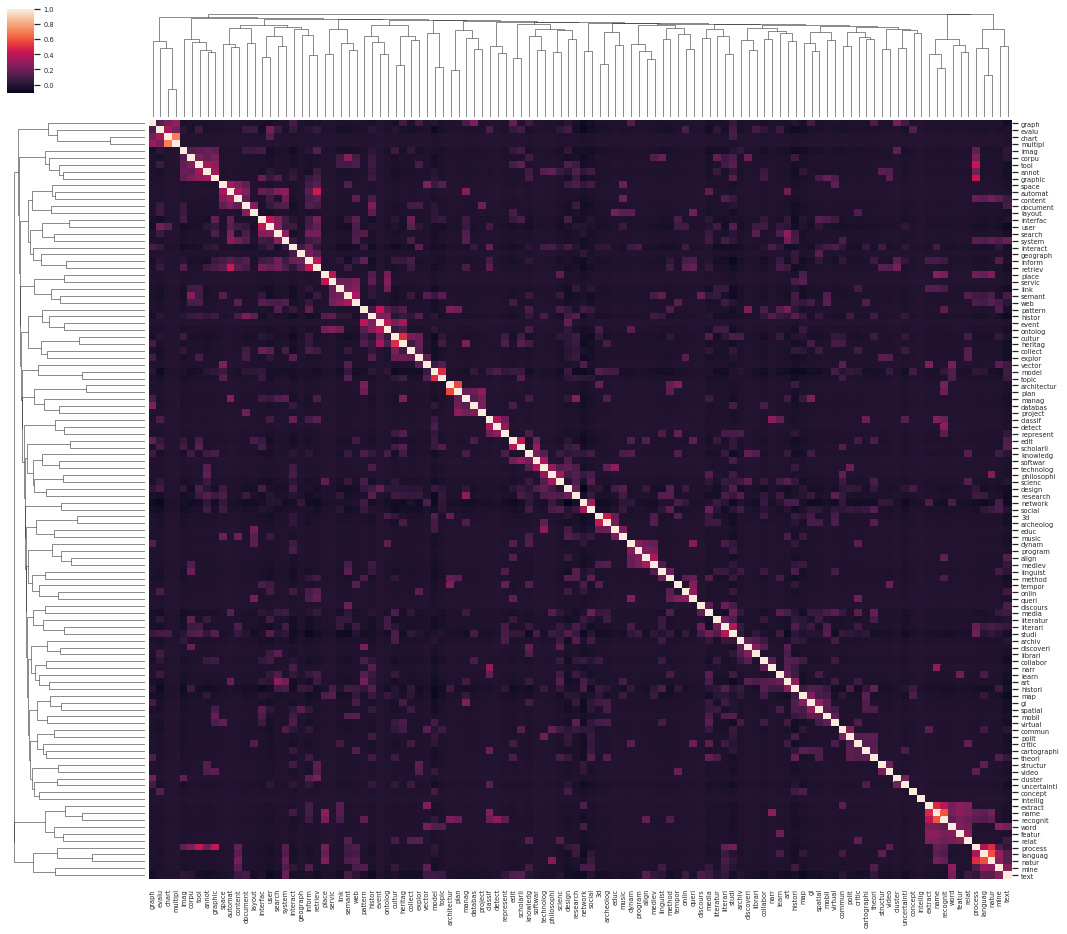

In [0]:
#@title Generate correlation matrix
keys = list(filtered_assoc.keys())
# print(keys)
keys.sort()
# print(keys)
key_doc_df = pd.DataFrame(index=keys)

for idx, a_row in all_keywords_df.iterrows():
  # print(idx)
  observation = []
  for keyword in key_doc_df.index:
    if keyword in a_row["reencoded_keywords"]:
      observation.append(1.0)
    else:
      observation.append(0.0)
  key_doc_df[idx] = observation

key_doc_df = key_doc_df.T 
# correlation_matrix = np.corrcoef(key_doc_df)
corr = key_doc_df.corr()
corr = corr.dropna(axis=0, how='all')
corr = corr.dropna(axis=1, how='all')
# for a in key_doc_df['adapt']:
#   print(a)
# for a in corr['adapt']:
#   print(a)
print(corr)
# # plt.matshow(correlation_matrix)
# plt.figure(figsize = (24,24))
sns.set(font_scale=0.6)
# sns.heatmap(corr)
sns.clustermap(corr, figsize=(18,16))

In [0]:
key_doc_df

,3d,align,annot,archeolog,architectur,archiv,art,automat,cartographi,chart,classif,cluster,collabor,collect,commun,concept,content,corpu,critic,cultur,databas,design,detect,discours,discoveri,display,document,dynam,edit,educ,evalu,event,explor,extract,featur,filter,geograph,gi,graph,graphic,...,ontolog,pattern,philosophi,place,plan,polit,process,program,project,queri,recognit,relat,represent,research,retriev,scholarli,scienc,search,semant,servic,social,softwar,space,spatial,structur,studi,system,technolog,tempor,text,theori,tool,topic,uncertainti,user,vector,video,virtual,web,word
KLCRKR3Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YNVW2K52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L6QQLXG4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JNRX9MYP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EVPMNQ5T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8EAD4521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3C171A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C4EE651B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CE1CC599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(corr)

                   3d     align     annot  ...   virtual       web      word
3d           1.000000 -0.019189 -0.028695  ...  0.090174 -0.025885 -0.019189
align       -0.019189  1.000000 -0.020153  ... -0.017117 -0.018180 -0.013477
annot       -0.028695 -0.020153  1.000000  ... -0.025596 -0.027186 -0.020153
archeolog    0.433811 -0.017117 -0.025596  ...  0.105978 -0.023089 -0.017117
architectur  0.170970 -0.010411 -0.015569  ... -0.013223 -0.014044 -0.010411
...               ...       ...       ...  ...       ...       ...       ...
vector      -0.017140 -0.012038 -0.018001  ... -0.015289 -0.016239  0.214278
video       -0.019189 -0.013477  0.117622  ... -0.017117 -0.018180 -0.013477
virtual      0.090174 -0.017117 -0.025596  ...  1.000000 -0.023089 -0.017117
web         -0.025885 -0.018180 -0.027186  ... -0.023089  1.000000 -0.018180
word        -0.019189 -0.013477 -0.020153  ... -0.017117 -0.018180  1.000000

[110 rows x 110 columns]


In [0]:
key_doc_df

,3d,align,annot,archeolog,architectur,archiv,art,automat,cartographi,chart,classif,cluster,collabor,collect,commun,concept,content,corpu,critic,cultur,databas,design,detect,discours,discoveri,display,document,dynam,edit,educ,evalu,event,explor,extract,featur,filter,geograph,gi,graph,graphic,...,ontolog,pattern,philosophi,place,plan,polit,process,program,project,queri,recognit,relat,represent,research,retriev,scholarli,scienc,search,semant,servic,social,softwar,space,spatial,structur,studi,system,technolog,tempor,text,theori,tool,topic,uncertainti,user,vector,video,virtual,web,word
KLCRKR3Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YNVW2K52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L6QQLXG4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JNRX9MYP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EVPMNQ5T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8EAD4521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3C171A01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C4EE651B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CE1CC599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#@title Show most/less correlated
for idx, item in corr.iteritems():
  for col in corr.columns:
    if col > idx: #Show only one half
#       if item[col] >= 1 - thresold or item[col] <= -1 + thresold:
      if item[col] < -0.1 or item[col] > 0.5:
        print(idx, col, item[col])

architectur plan 0.5734759517901791
chart multipl 0.7061633427661534
cultur heritag 0.5056222561459461
design network -0.11321669260047121
languag natur 0.5894256730461741
model topic 0.5039050863668388
name recognit 0.607422843576033


In [0]:
#@title Cluster the correlation matrix and visualize it

X = corr.values
d = sch.distance.pdist(X, 'sqeuclidean')
# print(d)
L = sch.linkage(d, method='ward', metric='sqeuclidean')

# fig, ax = plt.subplots(figsize=(24, 15)) # set size
# ax = sch.dendrogram(
#     L, 
#     orientation="bottom",
#     leaf_font_size=8,
#     labels=corr.index.tolist(),
# #     truncate_mode='lastp',
# #     p=16,
#     show_contracted=True
# );

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')

# # plt.tight_layout() #show plot with tight layout

In [0]:
corr.index.copy()

Index(['3d', 'align', 'annot', 'archeolog', 'architectur', 'archiv', 'art',
       'automat', 'cartographi', 'chart',
       ...
       'theori', 'tool', 'topic', 'uncertainti', 'user', 'vector', 'video',
       'virtual', 'web', 'word'],
      dtype='object', length=110)

In [0]:
#@title fcluster
# clustered_ks = sch.fcluster(L, d.max() * 0.95, t=20, criterion='maxclust')
clustered_ks = sch.fcluster(L,19,criterion='maxclust')
# clustered_ks = sch.fcluster(L, t=20, criterion='maxclust')
keyws_clustered = pd.DataFrame({'cluster': clustered_ks}, index = corr.index.copy())

# pp.pprint(cluster_nos)
print('Generated {} clusters'.format(str(len(keyws_clustered.cluster.unique()))))
# for 


# for i in range(1,n_clusters + 1):
#   print("cluster #" + str(i))
#   print(keyws_clustered.loc[keyws_clustered['cluster'] == i].index.tolist())


Generated 19 clusters


In [0]:
keyws_clustered.head(10)

,cluster
3d,16
align,14
annot,3
archeolog,16
architectur,12
archiv,15
art,15
automat,1
cartographi,18
chart,7


In [0]:
#@title Create network from correlation matrix and plot
links = corr.stack().reset_index()
links.columns = ['keyword1', 'keyword2', 'weight']
# links


#Visualize

In [0]:
#@title Generate graph and calculate betweenness and density per cluster
groups = keyws_clustered.groupby(['cluster'])


groups_keys = dict()

for name, group in groups:
  for idx, a_row in group.iteritems():
    groups_keys[a_row[1]] = a_row.index.tolist()

G = nx.from_pandas_edgelist(links, 'keyword1', 'keyword2', ['weight']).to_undirected()

keyws_clustered['color'] = [d3["Category20"][20][int(k )%20-1] for k in clustered_ks ]


In [0]:
print(groups_keys)

{1: ['automat', 'content', 'inform', 'interfac', 'retriev', 'search', 'space', 'system', 'user'], 2: ['languag', 'natur', 'process'], 3: ['annot', 'graphic', 'imag', 'tool'], 4: ['link', 'semant', 'web'], 5: ['corpu', 'linguist', 'literari', 'literatur', 'studi'], 6: ['extract', 'featur', 'name', 'recognit', 'relat'], 7: ['chart', 'evalu', 'graph', 'multipl'], 8: ['collect', 'cultur', 'explor', 'heritag'], 9: ['event', 'histor', 'ontolog', 'place', 'servic'], 10: ['mine', 'text', 'vector', 'word'], 11: ['edit', 'model', 'scholarli', 'topic'], 12: ['architectur', 'databas', 'manag', 'plan', 'project'], 13: ['design', 'knowledg', 'philosophi', 'research', 'scienc', 'softwar', 'technolog'], 14: ['align', 'dynam', 'mediev', 'program'], 15: ['archiv', 'art', 'collabor', 'discoveri', 'histori', 'learn', 'librari', 'pattern'], 16: ['3d', 'archeolog', 'discours', 'gi', 'map', 'media', 'mobil', 'spatial', 'virtual'], 17: ['classif', 'detect', 'narr', 'represent'], 18: ['cartographi', 'commun', 

In [0]:
def sort_stem(stem):
  return stemmed_keywords_counter[stem]

centrality_dict = nx.betweenness_centrality(G, k=2, normalized=True, weight='weight')
centralities_df = pd.DataFrame(index=list(groups_keys.keys()), columns=['centrality', 'members_no', 'top_words', 'members', 'avg_freq', 'coword_freq'])

all_keywords_list = all_keywords_df['reencoded_keywords'].tolist()
for key,val in groups_keys.items():
  print('Cluster #' + str(key))
  sum_b = 0
  for kw in val:
    print(kw, centrality_dict[kw])
    sum_b+=centrality_dict[kw]

  val.sort(reverse=True, key=sort_stem)
  ocs = [] 
  coocs = []
  for k in val:
    times = 0
    for l in all_keywords_list:
      if k in l:
        times += 1
    ocs.append(times)

  for (k1, k2) in itertools.combinations(val, 2):
    times = 0
    selSet = set([k1, k2])
    for l in all_keywords_list:
      if selSet.issubset(set(l)):
        times += 1
    coocs.append(times)
  



  centralities_df.loc[key,'centrality'] = sum_b/len(val)
  centralities_df.loc[key,'members_no'] = len(val) 
  centralities_df.loc[key]['top_words'] = val[:5]
  centralities_df.loc[key]['members'] = val
  centralities_df.loc[key,'avg_freq'] = sum(ocs)/len(ocs)
  centralities_df.loc[key,'coword_freq'] = sum(coocs)/len(coocs)
  
  
  print('Average centrality is: ' + str(sum_b/len(val)))

  
print(centralities_df)

Cluster #1
automat 0.07475365273530411
content 0.2896704043493034
inform 0.8783554196398233
interfac 0.8596670064559973
retriev 0.672782874617737
search 0.5326197757390418
space 0.22426095820591235
system 0.4111450900441726
user 0.9531090723751274
Average centrality is: 0.5440404726847132
Cluster #2
languag 0.616717635066259
natur 0.34573564390078154
process 0.48589874277947676
Average centrality is: 0.48278400724883913
Cluster #3
annot 0.8036017669045192
graphic 0.5139313625552158
imag 0.9437648657832144
tool 0.46721032959565073
Average centrality is: 0.68212708120965
Cluster #4
link 0.7662249405368672
semant 0.8129459734964323
web 0.5886850152905199
Average centrality is: 0.7226186431079397
Cluster #5
corpu 0.635406048250085
linguist 0.68212708120965
literari 0.8316343866802582
literatur 0.7849133537206932
studi 0.8876996262317364
Average centrality is: 0.7643560992184846
Cluster #6
extract 0.2803261977573904
featur 0.14950730547060823
name 0.2616377845735644
recognit 0.2009004417261

In [0]:
keyws_clustered.head(10)

,cluster,color
3d,16,#c7c7c7
align,14,#f7b6d2
annot,3,#ff7f0e
archeolog,16,#c7c7c7
architectur,12,#c49c94
archiv,15,#7f7f7f
art,15,#7f7f7f
automat,1,#1f77b4
cartographi,18,#dbdb8d
chart,7,#d62728


In [0]:
measures_df = pd.DataFrame(index=keyws_clustered.cluster.unique(), columns=["inside", "density"])
measures_df['inside'] = np.empty((len(measures_df), 0)).tolist()

for u,v,a in G.edges(data=True):
  if u == v:
    continue
  if keyws_clustered.loc[u]['cluster'] == keyws_clustered.loc[v]['cluster']:
    measures_df.loc[keyws_clustered.loc[u, 'cluster']]['inside'].append(a['weight'])

for idx, a_row in measures_df.iterrows():
  measures_df.loc[idx, 'density'] = np.mean(a_row['inside'])




In [0]:
measures_df

,inside,density
16,"[0.4338109837117681, -0.012087560311599408, 0....",0.0694167
14,"[0.18921832884097103, 0.3557859168925761, 0.25...",0.240629
3,"[0.32636061145566536, 0.19009695644931027, 0.3...",0.238974
12,"[-0.011420391039615353, -0.012352135535772133,...",0.177035
15,"[-0.032852488654481406, 0.05352888011534479, 0...",0.0795522
1,"[0.34881532257379816, 0.14559567749027277, 0.1...",0.163011
18,"[-0.021049133398705823, 0.12830053095616933, -...",0.0692599
7,"[0.33604849932331576, 0.2151585735464663, 0.70...",0.321705
17,"[0.34881532257379827, 0.28208817088057375, 0.1...",0.181511
19,"[-0.006558211345740325, -0.010782023669543735,...",0.0107182


In [0]:
centralities_df

,centrality,members_no,top_words,members,avg_freq,coword_freq
1,0.54404,9,"[user, inform, interfac, retriev, search]","[user, inform, interfac, retriev, search, syst...",10.2222,1.63889
2,0.482784,3,"[languag, process, natur]","[languag, process, natur]",7,3.33333
3,0.682127,4,"[imag, annot, graphic, tool]","[imag, annot, graphic, tool]",10.5,2.5
4,0.722619,3,"[semant, link, web]","[semant, link, web]",11.3333,3.33333
5,0.764356,5,"[studi, literari, literatur, linguist, corpu]","[studi, literari, literatur, linguist, corpu]",17.6,2.8
6,0.225195,5,"[recognit, relat, extract, featur, name]","[recognit, relat, extract, featur, name]",4.2,1.4
7,0.413481,4,"[evalu, graph, chart, multipl]","[evalu, graph, chart, multipl]",7.5,1.33333
8,0.749873,4,"[cultur, collect, heritag, explor]","[cultur, collect, heritag, explor]",12.75,3.16667
9,0.30649,5,"[histor, ontolog, place, servic, event]","[histor, ontolog, place, servic, event]",6.2,1
10,0.530284,4,"[text, mine, vector, word]","[text, mine, vector, word]",12.5,2.16667


In [0]:
concat_frame =  pd.concat([dh_papers_df, vis4dh_papers_df, citations_df])
reenc_keywords_list = concat_frame['reencoded_keywords'].tolist()
for idx, a_row in centralities_df.iterrows():
  print(idx)
  print('Top papers:')
  print(a_row['members'])
  for i, s in enumerate(reenc_keywords_list):
    if set(a_row['top_words']) & set(s): 
      # if 'Workshop' in concat_frame.iloc[i]['publication_title']:
      print(concat_frame.iloc[i]['author_keywords'], concat_frame.iloc[i]['title'])
      print()
  print()
  print()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


1
Top papers:
['user', 'inform', 'interfac', 'retriev', 'search', 'system', 'content', 'space', 'automat']
art history;search engine;patterns;deep learning;convolutional neural networks Visual Patterns Discovery in Large Databases of Paintings

character network;user interface;visualisation;web application;temporality Visualising the Dynamics of Character Networks

interaction design;trade history;exploratory data analysis;data uncertainty;information design RICardo Project : Exploring 19th Century International Trade

user interface;citation;visualisation;close reading CTRaCE: Canonical Text Reader and Citation Exporter

collaborative annotation;social network analysis;maps;literature;user experience Collaborative Annotation and Exploration of Literary Works in Learning Contexts

visual forms of information presentation;formal scientific communication;digital scientific communication Visual Forms of Information Presentation and Their Place in Formal Digital Scientific Communication

i

In [0]:
stemmed_keywords_counter['mine']

10

In [0]:
measures_df = pd.concat([measures_df, centralities_df], axis=1)

def cluster_color(x):
  return d3["Category20"][20][int(x)%20-1]

measures_df.reset_index(inplace=True)

measures_df['color'] = measures_df['index'].apply(cluster_color)

measures_df.set_index('index', drop=True, inplace=True)

In [0]:
measures_df = measures_df.drop(['inside'], axis=1)


In [0]:
measures_df

,density,centrality,members_no,top_words,members,avg_freq,coword_freq,color,circle_size
index,,,,,,,,,
1,0.163011,0.54404,9,"[user, inform, interfac, retriev, search]","[user, inform, interfac, retriev, search, syst...",10.2222,1.63889,#1f77b4,22.5
2,0.484456,0.482784,3,"[languag, process, natur]","[languag, process, natur]",7,3.33333,#aec7e8,7.5
3,0.238974,0.682127,4,"[imag, annot, graphic, tool]","[imag, annot, graphic, tool]",10.5,2.5,#ff7f0e,10.0
4,0.277981,0.722619,3,"[semant, link, web]","[semant, link, web]",11.3333,3.33333,#ffbb78,7.5
5,0.131776,0.764356,5,"[studi, literari, literatur, linguist, corpu]","[studi, literari, literatur, linguist, corpu]",17.6,2.8,#2ca02c,12.5
6,0.325354,0.225195,5,"[recognit, relat, extract, featur, name]","[recognit, relat, extract, featur, name]",4.2,1.4,#98df8a,12.5
7,0.321705,0.413481,4,"[evalu, graph, chart, multipl]","[evalu, graph, chart, multipl]",7.5,1.33333,#d62728,10.0
8,0.222181,0.749873,4,"[cultur, collect, heritag, explor]","[cultur, collect, heritag, explor]",12.75,3.16667,#ff9896,10.0
9,0.199086,0.30649,5,"[histor, ontolog, place, servic, event]","[histor, ontolog, place, servic, event]",6.2,1,#9467bd,12.5


In [0]:
for n in measures_df['coword_freq'].tolist():
  print('%.3f' % n)

1.639
3.333
2.500
3.333
2.800
1.400
1.333
3.167
1.000
2.167
2.833
0.800
1.143
1.167
1.143
0.889
0.667
1.429
0.142


In [0]:
#@title Set up graph parameters 🕸 { run: "auto" }
correlation_strenght = 0.22 #@param {type:"slider", min:0.10, max:0.90, step:0.01}

links_filtered=links.loc[ (links['weight'] > correlation_strenght) & (links['keyword1'] != links['keyword2']) ].copy()
links_filtered['weight_2'] = links_filtered['weight'] * 10

# links_filtered.loc[:,'weight_edge'] = links_filtered.loc[:,'weight'] / 2


# G_filtered = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2', ['weight', 'weight_edge'])
G_filtered = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2', ['weight', 'weight_2'])
# G = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2')
# print(len(G_filtered.nodes()))
# print(G_filtered.number_of_nodes())
# print(G_filtered.nodes())
# print(G_filtered.edges())

# print(keyws_clustered.shape)
# print(1/math.sqrt(G_filtered.number_of_nodes()))


for n in G_filtered.copy().nodes():
  G_filtered.nodes[n]['radius'] = np.log(stemmed_keywords_counter[n] + 2) / 100

keyws_clustered_g = keyws_clustered.reindex(G_filtered.nodes())

# nx.set_edge_attributes(G_filtered, edge_attrs, "edge_color")
nx.set_node_attributes(G_filtered, keyws_clustered['color'], "color")
nx.set_node_attributes(G_filtered, keyws_clustered['cluster'], "cluster")

keyws_clustered_g = keyws_clustered_g.filter(G_filtered.nodes(), axis=0)


df_pos = pd.DataFrame(index=G_filtered.nodes(), columns=G_filtered.nodes())
for a_row, data in nx.shortest_path_length(G_filtered):
    for col, dist in data.items():
        df_pos.loc[a_row,col] = dist * 1.7

df_pos = df_pos.fillna(df_pos.max().max() * 0.6)

In [0]:
#@title Draw map and strategic diagram

def scatter_circle_size(members_no):
  return members_no * 2.5


measures_df['circle_size'] = measures_df['members_no'].apply(scatter_circle_size)
source_st = ColumnDataSource(measures_df)

p = figure(plot_width=800, plot_height=800, tooltips=[("top words", "@top_words")])
p.scatter(x='centrality', y='density', source=source_st, size="circle_size", fill_color="color")
p.xaxis[0].axis_label = 'Centrality'
p.yaxis[0].axis_label = 'Density'

x_lines_padding = 0.2 * measures_df['centrality'].median()
y_lines_padding = 0.2 * measures_df['density'].median()

#vertical median
p.line(x=[measures_df['centrality'].median(), measures_df['centrality'].median()],
       y=[-x_lines_padding, measures_df['density'].max() + x_lines_padding])

#horizontal median
p.line(x=[measures_df['centrality'].min() - y_lines_padding,
          measures_df['centrality'].max() + y_lines_padding],
       y=[measures_df['density'].median(), measures_df['density'].median()])

p.add_layout(LabelSet(x='centrality', 
                  y='density', 
                  text='index', 
                  source=source_st, 
                  text_align='center', 
                  text_baseline='hanging',
                  y_offset=-5,
                  text_font_size='12pt'))

# p.add_layout(LabelSet(x=0.3, 
#                   y=[-0.5], 
#                   text=['Undeveloped'], 
#                   background_fill_color='white',
#                   background_fill_alpha=0.5,
#                   source=source_st, 
#                   text_align='center', 
#                   text_baseline='hanging',
#                   y_offset=-5,
#                   text_font_size='12pt'))




#Show with Bokeh
plot = Plot(plot_width=800, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Keywords Map"

node_hover_tool = HoverTool(tooltips=[("keyword", "@index"), ("cluster", "@cluster")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool(), PanTool(), WheelZoomTool(), SaveTool())

# graph_renderer = from_networkx(G, nx.spring_layout, scale=1, k=0.09, center=(0, 0))
graph_renderer = from_networkx(G_filtered, nx.kamada_kawai_layout, scale=1.0, dim=2, dist=df_pos.to_dict())

 
graph_renderer.node_renderer.glyph = Circle(radius='radius', fill_color="color")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="black", line_alpha=0.7, line_width='weight_2')
plot.renderers.append(graph_renderer)


x, y = zip(*graph_renderer.layout_provider.graph_layout.values())
node_labels = nx.nodes(G_filtered)

source = ColumnDataSource({'x': x, 'y': y,
                           'key': [l for l in node_labels]})


labels = LabelSet(x='x', 
                  y='y', 
                  text='key', 
                  source=source,
                  background_fill_color='white',
                  background_fill_alpha=0.8,
                  text_align='center', 
                  text_baseline='middle',
                  x_offset=5,
                  y_offset=15,
                  text_font_size='0.8em')

plot.renderers.append(labels)
# output_notebook()
# show(plot)


#



output_notebook()
show(row(p, plot))



In [0]:
# nx.draw_circular(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
# plt.figure(figsize=(22,22))
# # nx.draw_kamada_kawai(G, scale=2, with_labels=True,node_size=80,font_size=12)
# # nx.draw_spring(G, scale=2, with_labels=True,node_size=12,font_size=12)
# # nx.draw(G, pos=nx.spring_layout(G, k=0.12, weight='weight'),node_color=keyws_clustered_g['cluster'], cmap=plt.cm.Set1, node_size=400, font_size=16)
# nx.draw(G_filtered, with_labels=True, pos=nx.kamada_kawai_layout(G_filtered, scale=2, center=[0,0], dim=2, dist=df_pos.to_dict()), node_color=keyws_clustered_g['cluster'], cmap=plt.cm.Set1, node_size=200, font_size=22, width=1)
